## **Examen de certificación – Intento 3**

### **Instrucciones para examen**

**Objetivo:** Este examen tiene como objetivo evaluar la capacidad del estudiante para limpiar, explorar, implementar y evaluar modelos de clasificación en un dataset de deserción de clientes. Utilizaremos el «Customer Churn Dataset» disponible en Kaggle. Los estudiantes deben demostrar habilidades prácticas en la manipulación de datos, creación de visualizaciones y modelado predictivo.

#### **Contexto y Descripción del Dataset**

El «Customer Churn Dataset» contiene datos de una compañía de telecomunicaciones que describen el comportamiento de los clientes y su tendencia a desertar (churn). La tarea es predecir si un cliente abandonará la compañía basándose en varias características demográficas y de uso del servicio.

**Diccionario de Datos:**


Aquí tienes la tabla corregida y completada:

| **Columna**             | **Descripción**                                                                |
|-------------------------|--------------------------------------------------------------------------------|
| **customerID**           | Un identificador único para cada cliente.                                      |
| **Age**                  | Edad del cliente.                                                              |
| **gender**               | El género del cliente (Male/Female).                                            |
| **tenure**               | Número de meses que el cliente ha estado con la compañía.                      |
| **Payment Delay**        | Retraso en los pagos del cliente                                                |
| **Subscription Type**    | Tipo de suscripción del cliente (Standar, Basic, Premium).                      |
| **Contract Length**      | Duración del contrato del cliente (Annual, Month, Quaterly).                    |
| **Usage Frequency**      | Frecuencia de uso del servicio por el cliente.                                   |
| **Support Calls**        | Número de llamadas al servicio de soporte realizadas por el cliente.           |
| **Last Interaction**     | Fecha y hora de la última interacción del cliente con la compañía.             |
| **Total Spend**          | Gasto total del cliente en la compañía.                                        |
| **Churn**                | Indica si el cliente ha abandonado la compañía (Yes/No).                       |


### **Requisitos**

#### **Limpieza de Datos:**

- Identificación y eliminación de valores duplicados: Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.
- Verificación y ajuste de tipos de datos: Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.
- Corrección de inconsistencias en valores categóricos: Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.
- Manejo de valores faltantes adecuadamente: Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

#### **Exploración de Datos:**

- Visualizaciones univariadas y multivariadas: Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.
- Estadísticas descriptivas: Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.

#### **Implementación de Modelos:**
- Modelos de Clasificación: Implementa modelos de SVM y XGBoost.
- Optimización de Modelos: Utiliza RandomizedSearchCV para optimizar los hiperparámetros de los modelos.
- Evaluación de Modelos: Evalúa los modelos utilizando métricas como accuracy, precision, recall, F1-score, y ROC-AUC.
- Comparación de Rendimiento: Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.

#### **Entrega**

Los estudiantes deben entregar un archivo .ipynb comentado que incluya:

- Proceso completo de limpieza y preprocesamiento de datos.
- Visualizaciones y estadísticas descriptivas.
- Implementación y evaluación de los modelos de clasificación.
- Análisis comparativo del rendimiento de los modelos.

Además, el archivo debe subirse a GitHub con un tag de liberación (release tag) que permita identificar la entrega final.

#### **Consideraciones Éticas y Tecnológicas**

**Consideraciones Éticas:**

- Transparencia y Reproducibilidad: Asegúrate de que todos los pasos del análisis sean claros y reproducibles. Otros investigadores deben poder seguir tus pasos y llegar a los mismos resultados.
- Imparcialidad y Sesgo: Revisa si existen sesgos en los datos que puedan afectar la imparcialidad del modelo. Es importante que los modelos no discriminen injustamente entre diferentes grupos de datos.

**Consideraciones Tecnológicas:**

- Herramientas Utilizadas: Utiliza herramientas estándar como Python, Jupyter Notebook, Pandas, Scikit-learn, Matplotlib y Seaborn.
- Escalabilidad: Considera cómo las técnicas aplicadas podrían escalarse para manejar conjuntos de datos más grandes y complejos.
- Optimización de Modelos: Utiliza técnicas como RandomizedSearchCV para optimizar los hiperparámetros y mejorar el rendimiento de los modelos.

### **Librerias y Dataset**

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import kagglehub
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb

In [2]:
# Descargar el dataset
path = kagglehub.dataset_download("muhammadshahidazeem/customer-churn-dataset")
print("Path to dataset files:", path)
# Cargar el dataset
dataset_path = os.path.join(path, "customer_churn_dataset-training-master.csv")
df = pd.read_csv(dataset_path)

Path to dataset files: C:\Users\guill\.cache\kagglehub\datasets\muhammadshahidazeem\customer-churn-dataset\versions\1


### **Exploratory Data Analysis**

In [3]:
print("Dimensiones del dataset:")
print(f"Features: {df.shape[1]}, Ejemplos: {df.shape[0]}")
print("Primeras 5 filas del dataset:")
df.head(10)

Dimensiones del dataset:
Features: 12, Ejemplos: 440833
Primeras 5 filas del dataset:


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
5,8.0,51.0,Male,33.0,25.0,9.0,26.0,Premium,Annual,129.0,8.0,1.0
6,9.0,58.0,Female,49.0,12.0,3.0,16.0,Standard,Quarterly,821.0,24.0,1.0
7,10.0,55.0,Female,37.0,8.0,4.0,15.0,Premium,Annual,445.0,30.0,1.0
8,11.0,39.0,Male,12.0,5.0,7.0,4.0,Standard,Quarterly,969.0,13.0,1.0
9,12.0,64.0,Female,3.0,25.0,2.0,11.0,Standard,Quarterly,415.0,29.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


Eliminamos la columna CustomerID porque no aporta nada relevante

In [5]:
# Elimina la columna CustomerID
df.drop('CustomerID', axis=1, inplace=True)

#### **Verificacion de NaN**

In [6]:
utils.calculate_na_statistics(df)

,datos sin NAs en q,Na en q,Na en %
Age,440832,1,0.0
Gender,440832,1,0.0
Tenure,440832,1,0.0
Usage Frequency,440832,1,0.0
Support Calls,440832,1,0.0
Payment Delay,440832,1,0.0
Subscription Type,440832,1,0.0
Contract Length,440832,1,0.0
Total Spend,440832,1,0.0
Last Interaction,440832,1,0.0


Filtramos la columna con NaN

In [7]:
nan_rows = df[df.isnull().any(axis=1)]

# Mostrar las filas con NaN
nan_rows.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Eliminamos esa columna porque no tiene nada

In [8]:
df.dropna(inplace=True)

#### **Analisis de duplicados**

In [9]:
duplicados = df.duplicated() # Identificar duplicados
num_duplicados = duplicados.sum() # Contar el número de duplicados
print(f"Número de registros duplicados en el dataset: {num_duplicados}")

Número de registros duplicados en el dataset: 0


#### **Analisis de distribucion de variables**

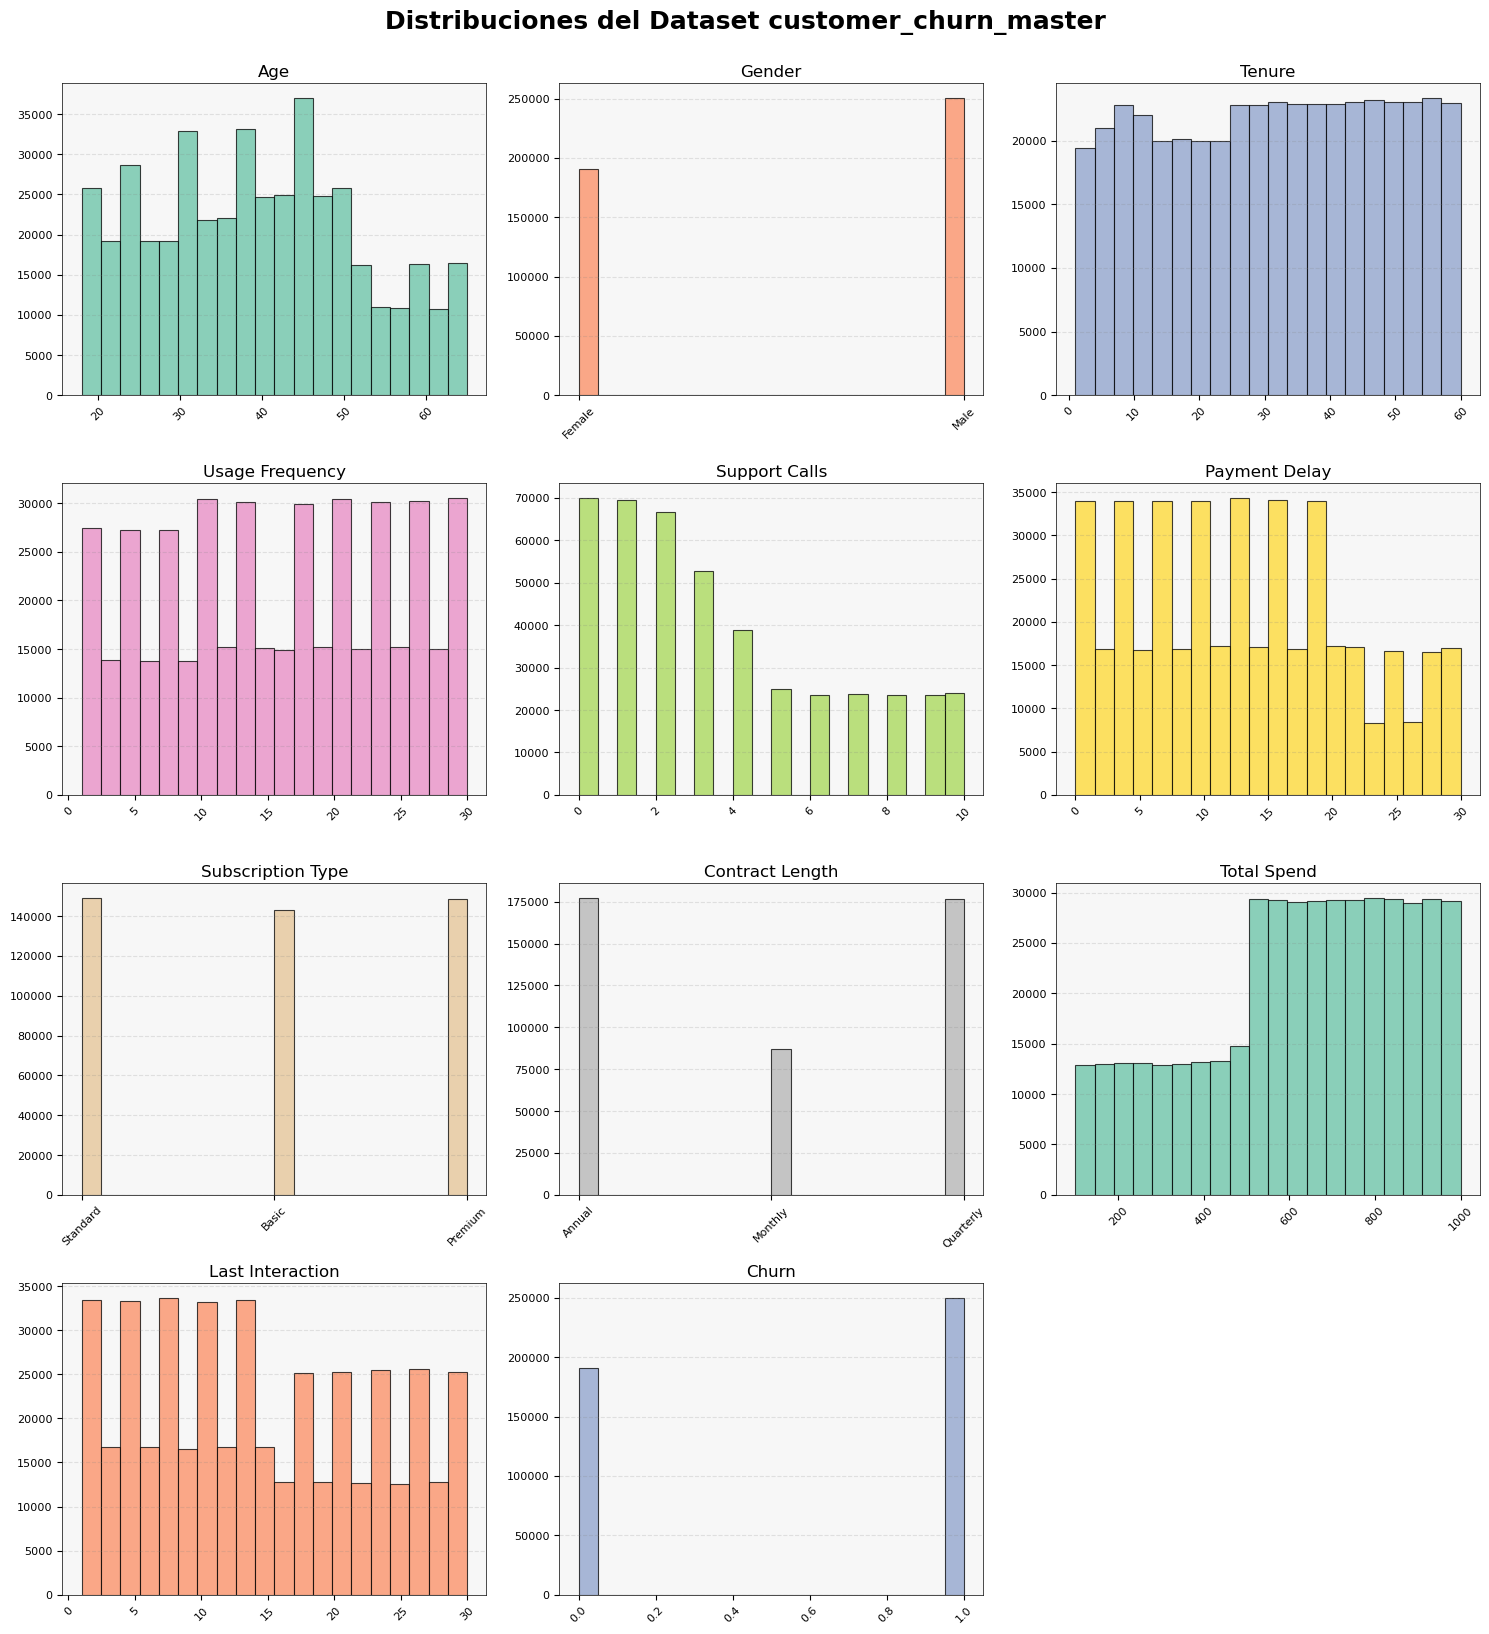

In [10]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20)) 
axes = axes.flatten()

colors = sns.color_palette("Set2", len(df.columns))
for i, col in enumerate(df.columns):
    if i < len(axes):  
         # Cambiar a ax.hist()
        axes[i].hist(df[col].dropna(), bins='sturges', color=colors[i], alpha=0.75, edgecolor='black', linewidth=0.8)
        
        # Estética
        axes[i].set_title(col, fontsize=12, pad=5)
        axes[i].grid(axis='y', linestyle='--', color='gray', alpha=0.2)
        axes[i].set_facecolor('#f7f7f7')
        axes[i].spines['top'].set_color('black')
        axes[i].spines['top'].set_linewidth(0.5)
        axes[i].spines['right'].set_color('black')
        axes[i].spines['right'].set_linewidth(0.5)
        axes[i].spines['left'].set_color('black')
        axes[i].spines['left'].set_linewidth(0.5)
        axes[i].spines['bottom'].set_color('black')
        axes[i].spines['bottom'].set_linewidth(0.5)
        axes[i].tick_params(axis='x', rotation=45, labelsize=8, colors='black')
        axes[i].tick_params(axis='y', labelsize=8, colors='black')

# Eliminar ejes sobrantes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Título general y espaciado
fig.suptitle('Distribuciones del Dataset customer_churn_master', fontsize=18, fontweight='bold', y= 1)
plt.tight_layout()
plt.show()

- **Age:** Tiene una distribución aproximadamente uniforme entre 20 y 60 años, con un ligero descenso en la frecuencia en los extremos (menores de 25 y mayores de 55 años).

- **Gender:** La cantidad de clientes está dividida casi equitativamente entre hombres y mujeres.

- **Tenure:** Distribución uniforme, lo que indica que los clientes tienen diferentes niveles de antigüedad con la empresa.

- **Usage Frequency:** Presenta una distribución uniforme en todas las categorías, lo que sugiere que el uso del servicio no tiene un sesgo fuerte hacia un nivel en particular.

- **Support Calls:** Se observa que la mayoría de los clientes realizan de 0 a 2 llamadas de soporte, con una caída significativa en frecuencias mayores a 3 llamadas.

- **Payment Delay:** La cantidad de clientes se distribuye de manera uniforme a través de las categorías de días de retraso, excepto por un leve descenso en los días más altos.

- **Subscription Type:** Distribución balanceada entre los tipos de suscripción estándar, básico y premium, lo que indica una oferta bien diversificada entre los usuarios.

- **Contract Length:** La mayoría de los clientes tienen contratos anuales, seguidos por los mensuales, con menor representación de los contratos trimestrales.

- **Total Spend:** La mayoría de los clientes tienen gastos acumulados entre 400 y 800, con un incremento en el número de clientes conforme el gasto aumenta hasta cerca de 800. Posteriormente, hay un ligero descenso.

- **Last Interaction:** Tiene una distribución uniforme, lo que sugiere que la última interacción de los clientes está bien distribuida a lo largo del tiempo.

- **Churn:** Variable binaria, con mayor número de clientes que no abandonaron (0) frente a los que abandonaron (1), indicando que el churn es relativamente bajo en este dataset.

#### **Consistencia en valores**

In [11]:
# Seleccionar las columnas categoricas
categorical_colums = df.select_dtypes(include=['object', 'category', 'bool'])
# Seleccionar las columnas numéricas
numerical_colums = df.select_dtypes(include=[np.number])

##### **Valores categoricos**

In [12]:
#Convierte las columnas objetc a category
categorical_colums = categorical_colums.apply(lambda col: pd.Categorical(col))

In [13]:
# Valores unicos mediante for
for col in categorical_colums.columns:
    print(f"Columna: {col}")
    print(f"Valores unicos: {df[col].unique()}")
    print()

Columna: Gender
Valores unicos: ['Female' 'Male']

Columna: Subscription Type
Valores unicos: ['Standard' 'Basic' 'Premium']

Columna: Contract Length
Valores unicos: ['Annual' 'Monthly' 'Quarterly']



**Analisis de variables categoricas por ***Subscription Type*****

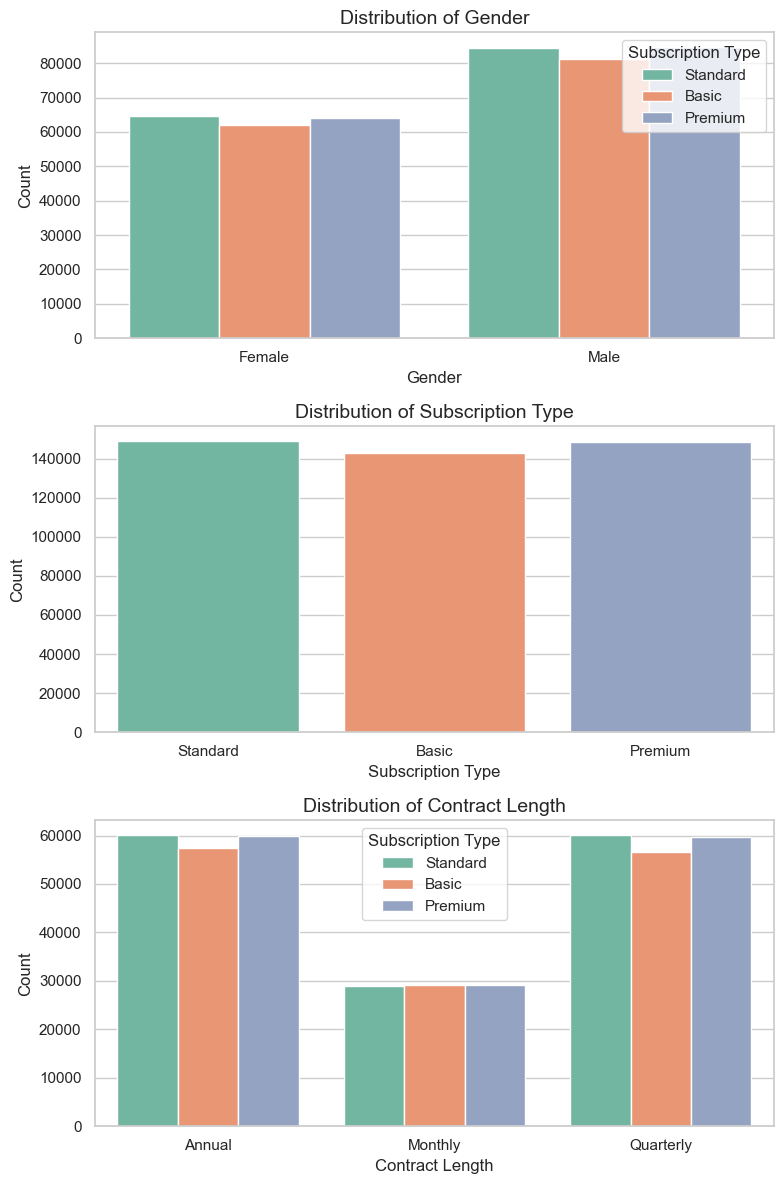

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo
sns.set_theme(style="whitegrid", palette="Set2")

# Identificar las columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Crear subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(8, len(categorical_columns) * 4))

# Crear un gráfico por columna categórica
for ax, col in zip(axes, categorical_columns):
    sns.countplot(data=df, x=col, ax=ax, hue='Subscription Type')
    ax.set_title(f'Distribution of {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

# Ajustar diseño
plt.tight_layout()
plt.show()

**Analisis de variables categoricas por ***Gender*****

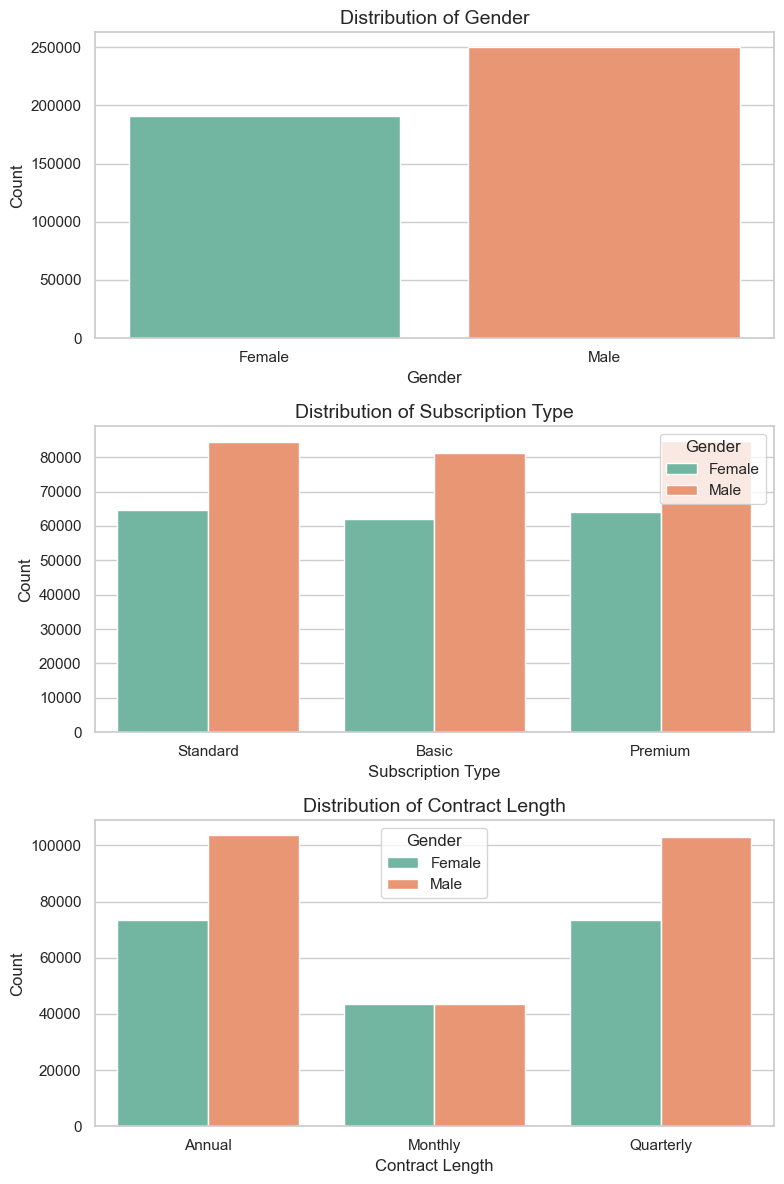

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo
sns.set_theme(style="whitegrid", palette="Set2")

# Identificar las columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Crear subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(8, len(categorical_columns) * 4))

# Crear un gráfico por columna categórica
for ax, col in zip(axes, categorical_columns):
    sns.countplot(data=df, x=col, ax=ax, hue='Gender')
    ax.set_title(f'Distribution of {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

# Ajustar diseño
plt.tight_layout()
plt.show()


**Analisis de variables categoricas por ***Contract Length*****

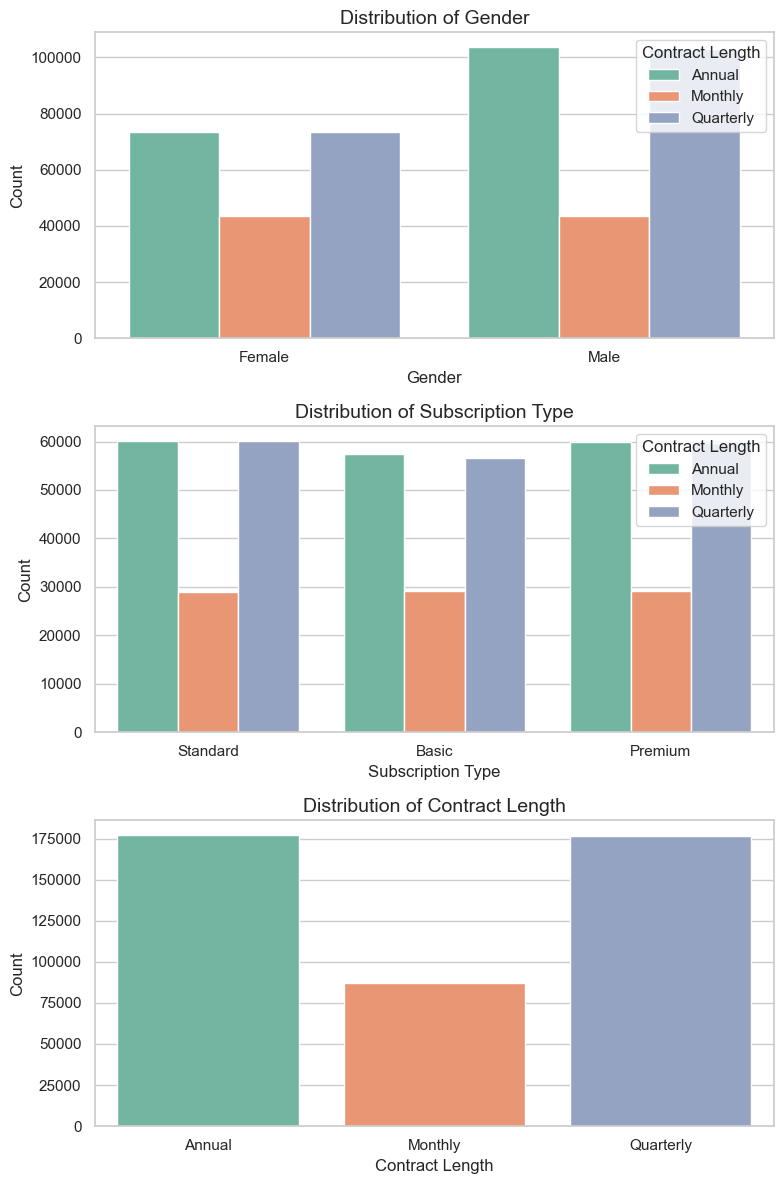

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo
sns.set_theme(style="whitegrid", palette="Set2")

# Identificar las columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Crear subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(8, len(categorical_columns) * 4))

# Crear un gráfico por columna categórica
for ax, col in zip(axes, categorical_columns):
    sns.countplot(data=df, x=col, ax=ax, hue='Contract Length')
    ax.set_title(f'Distribution of {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

# Ajustar diseño
plt.tight_layout()
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440832 non-null  float64
 1   Gender             440832 non-null  object 
 2   Tenure             440832 non-null  float64
 3   Usage Frequency    440832 non-null  float64
 4   Support Calls      440832 non-null  float64
 5   Payment Delay      440832 non-null  float64
 6   Subscription Type  440832 non-null  object 
 7   Contract Length    440832 non-null  object 
 8   Total Spend        440832 non-null  float64
 9   Last Interaction   440832 non-null  float64
 10  Churn              440832 non-null  float64
dtypes: float64(8), object(3)
memory usage: 40.4+ MB


##### **Valores numericos**

In [18]:
data_dict = {
    'Age': 'int',
    'Tenure': 'int',
    'Usage Frequency': 'int',
    'Support Calls': 'int',	
    'Payment Delay': 'int',
    'Total Spend': 'float',
    'Last Interaction': 'int',
    'Churn': 'bool'
}

numerical_colums = numerical_colums.astype(data_dict)
numerical_colums.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Age               440832 non-null  int32  
 1   Tenure            440832 non-null  int32  
 2   Usage Frequency   440832 non-null  int32  
 3   Support Calls     440832 non-null  int32  
 4   Payment Delay     440832 non-null  int32  
 5   Total Spend       440832 non-null  float64
 6   Last Interaction  440832 non-null  int32  
 7   Churn             440832 non-null  bool   
dtypes: bool(1), float64(1), int32(6)
memory usage: 17.2 MB


In [19]:
# Valores unicos mediante for
for col in numerical_colums.columns:
    print(f"Columna: {col}")
    print(f"Valores unicos: {df[col].unique()}")
    print()

Columna: Age
Valores unicos: [30. 65. 55. 58. 23. 51. 39. 64. 29. 52. 22. 48. 24. 49. 19. 47. 42. 57.
 27. 59. 21. 60. 35. 18. 56. 20. 63. 25. 28. 32. 38. 37. 31. 53. 41. 33.
 26. 36. 44. 34. 61. 40. 45. 46. 54. 43. 50. 62.]

Columna: Tenure
Valores unicos: [39. 49. 14. 38. 32. 33. 37. 12.  3. 18. 21. 41. 35.  4. 56. 44. 15. 55.
 43. 52. 26.  2. 29. 59. 40. 51. 53. 24. 30.  6. 28. 17. 60.  7. 34. 10.
  5. 45. 54. 58. 25. 13. 47. 31. 22. 19. 23.  1.  8. 46. 16. 50. 48. 11.
 42. 27.  9. 20. 57. 36.]

Columna: Usage Frequency
Valores unicos: [14.  1.  4. 21. 20. 25. 12.  8.  5.  9.  6. 17. 23. 13. 16. 27.  2. 28.
 29. 15. 24.  3. 22. 26. 30.  7. 11. 18. 19. 10.]

Columna: Support Calls
Valores unicos: [ 5. 10.  6.  7.  9.  3.  4.  2.  0.  1.  8.]

Columna: Payment Delay
Valores unicos: [18.  8.  7. 26. 16. 15.  4. 11. 30. 25. 13. 22.  5. 14.  3. 10. 28.  2.
  6. 27. 12. 29. 17. 24.  9. 23. 21.  1.  0. 20. 19.]

Columna: Total Spend
Valores unicos: [932.   557.   185.   ... 829.59 804.3  9

#### **Analisis de Outliers**

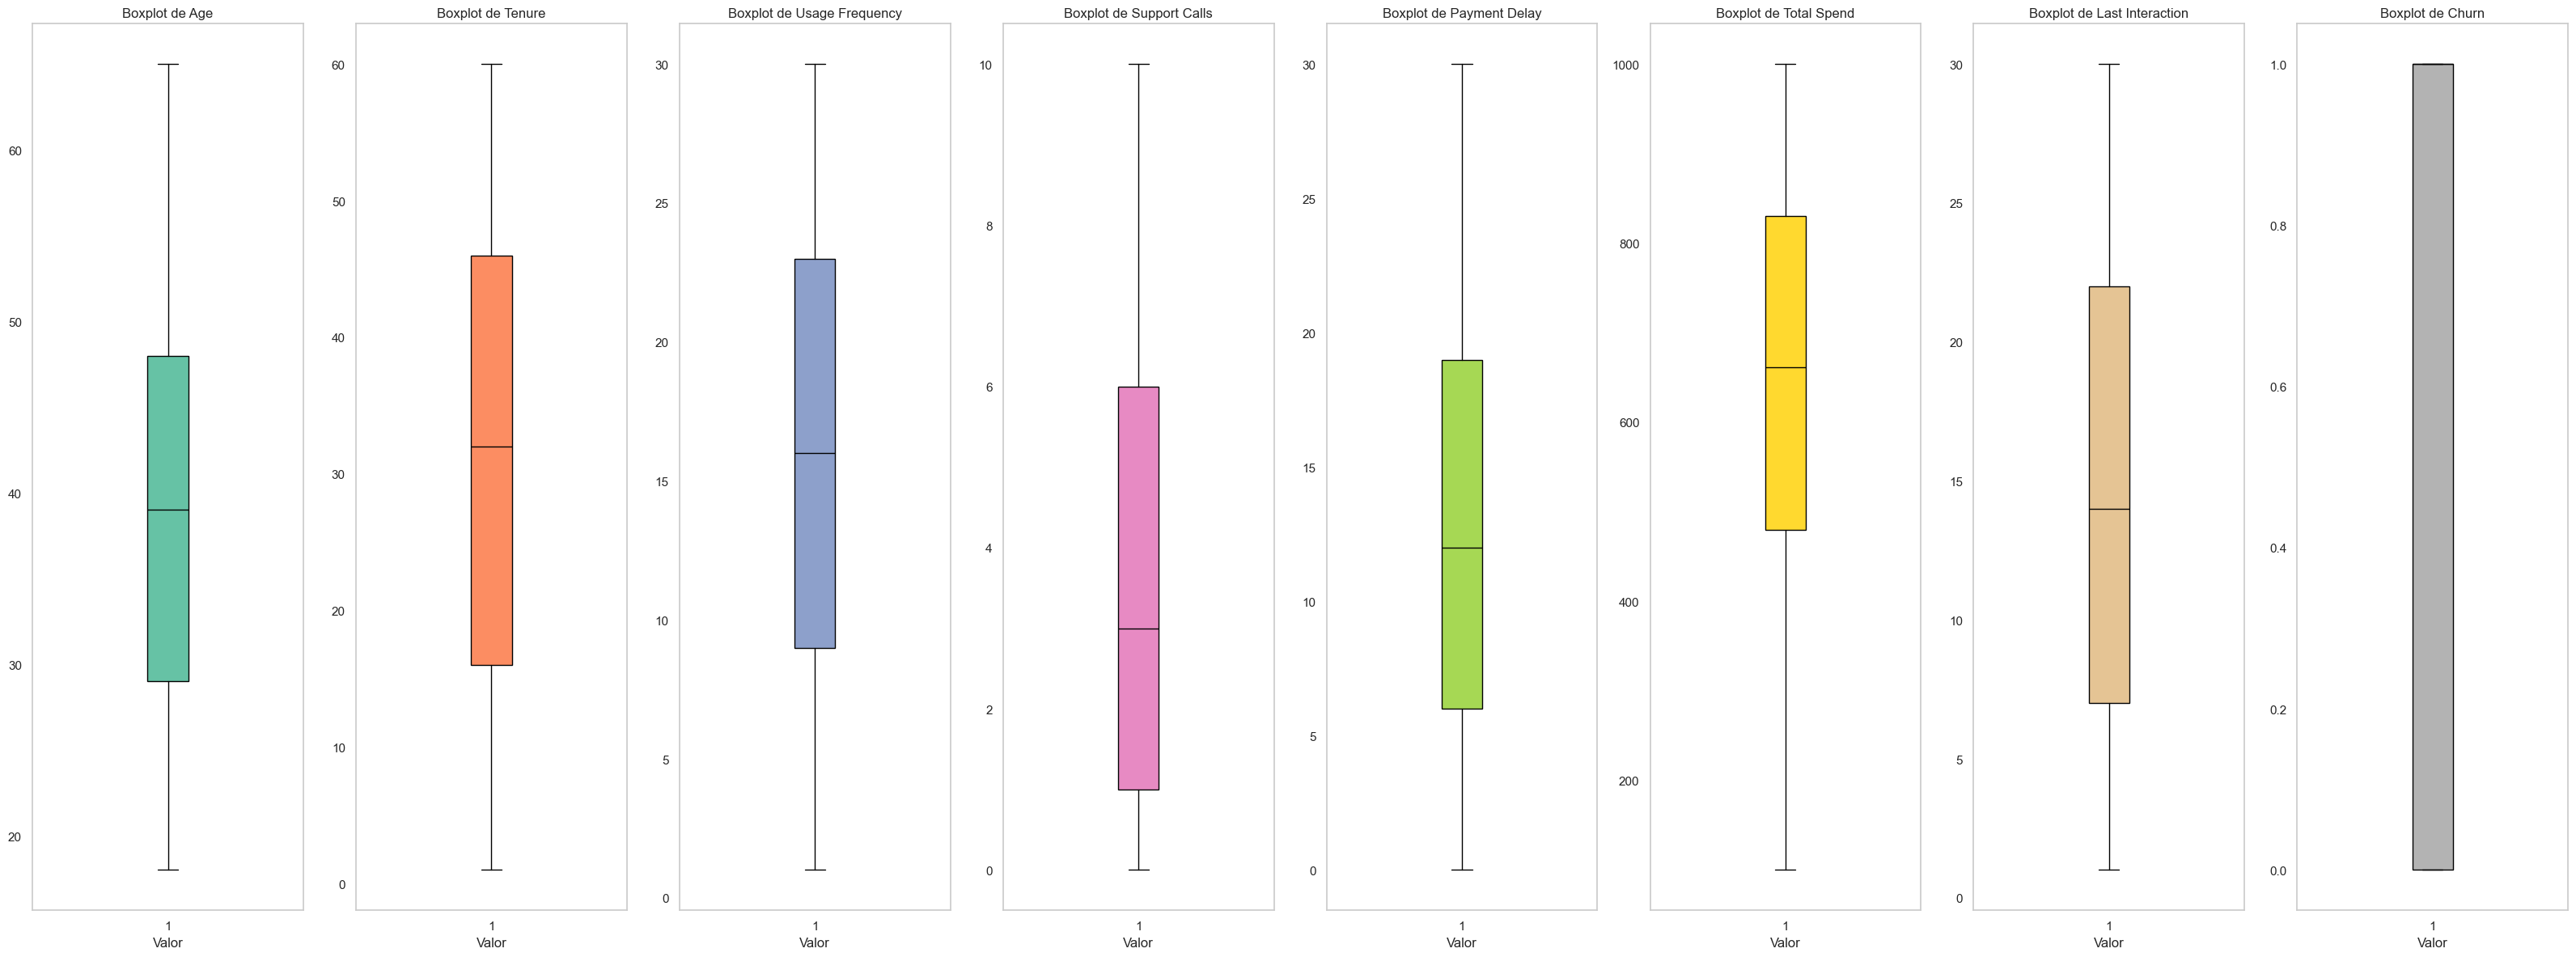

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener el número de columnas que se desean graficar
num_cols = df.select_dtypes(include=[np.number]).shape[1]  # Solo columnas numéricas

# Crear un número adecuado de subgráficos con un máximo de 6 columnas por fila
ncols = 8  # Máximo 6 columnas por fila
nrows = -(-num_cols // ncols)  # Calcular filas necesarias, redondeando hacia arriba
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4 * ncols, 12 * nrows))
axes = axes.flatten()  # Asegurarse de que 'axes' sea un arreglo plano


# Obtener una paleta de colores de seaborn
colors = sns.color_palette("Set2", num_cols)

# Graficar cada variable en un boxplot separado
for i, col in enumerate(df.select_dtypes(include=[np.number]).columns):
    # Convertir la columna a numérica, forzando valores no numéricos a NaN
    datos_columna = pd.to_numeric(df[col], errors='coerce')
    
    # Graficar solo si la columna contiene datos numéricos
    if datos_columna.dropna().shape[0] > 0:  # Verificar que haya valores válidos
        # Asignar color y modificar la línea de la mediana
        axes[i].boxplot(datos_columna, vert=True, patch_artist=True, 
                        boxprops=dict(facecolor=colors[i]),
                        medianprops=dict(color='black'))  # Línea de la mediana en negro
        axes[i].set_title(f'Boxplot de {col}')
        axes[i].set_xlabel('Valor')
        axes[i].grid()

# Ajustar el diseño
plt.tight_layout()
plt.show()


Para la variable ***Age (Edad)***, el rango intercuartil (IQR) se sitúa entre aproximadamente 30 y 50 años, con una mediana cercana a los 40 años. Esto indica que la mayoría de los clientes se encuentra dentro de este rango de edad y no hay valores atípicos destacados.

La variable ***Tenure (Antigüedad)*** refleja que los clientes suelen tener una antigüedad entre 15 y 45 meses, con una mediana alrededor de los 30 meses. Esto sugiere una distribución estable sin valores fuera de lo esperado.

En cuanto a ***Usage Frequency (Frecuencia de uso)***, los valores más comunes están entre 10 y 20 interacciones, con una mediana de aproximadamente 15. Esto sugiere un uso moderado de los servicios y, nuevamente, no se observan valores atípicos significativos.

La variable ***Support Calls (Llamadas de soporte)*** muestra que la mayoría de los clientes realizan entre 0 y 4 llamadas al servicio de soporte, con una mediana cercana a 2 llamadas. Esto indica que la mayoría de los usuarios tienen una interacción limitada con el soporte técnico.

Para ***Payment Delay (Retrasos en el pago)***, el IQR abarca retrasos entre 10 y 20 días, con una mediana en torno a los 15 días. La distribución parece ser uniforme y no presenta valores extremos, lo que sugiere un comportamiento de pagos relativamente consistente.

El gasto de los clientes, representado en ***Total Spend (Gasto total)***, se encuentra mayoritariamente entre 400 y 800 unidades, con una mediana alrededor de 600. Esto sugiere que los clientes tienen un gasto promedio consistente y no se observan anomalías en los datos.

***Last Interaction (Última interacción)*** indica que el tiempo desde la última interacción con el cliente varía entre 10 y 20 días, con una mediana en torno a los 15 días. La distribución es uniforme, sin valores atípicos que indiquen problemas en la periodicidad de las interacciones.

Por último, la variable ***Churn (Abandono)*** es binaria y muestra una separación clara entre los valores 0 y 1. La mediana se distribuye uniformemente, lo que indica que el dataset está balanceado entre clientes que abandonaron el servicio y los que no lo hicieron.

In [21]:
# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in df.select_dtypes(include=[np.number]):
    outliers = utils.detect_outliers_iqr(df[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': df[column][~outliers].min(),
        'Upper Bound': df[column][~outliers].max()
    }

outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
Age,0.0,0.0,18.0,65.0
Tenure,0.0,0.0,1.0,60.0
Usage Frequency,0.0,0.0,1.0,30.0
Support Calls,0.0,0.0,0.0,10.0
Payment Delay,0.0,0.0,0.0,30.0
Total Spend,0.0,0.0,100.0,1000.0
Last Interaction,0.0,0.0,1.0,30.0
Churn,0.0,0.0,0.0,1.0


#### **Estadisticas descriptivas**

In [22]:
# Crear un diccionario para almacenar las estadísticas
estadisticas_dict = {}
# Iterar sobre cada columna numérica y calcular las estadísticas
for columna in numerical_colums:
    datos_columna = df[columna].values
    estadisticas = utils.calcular_estadisticas(columna, datos_columna)
    estadisticas_dict[columna] = estadisticas
# Convertir el diccionario a un DataFrame para una mejor visualización
estadisticas_df = pd.DataFrame(estadisticas_dict).T  # Transponer para que las columnas sean las filas
estadisticas_df = estadisticas_df[['Cuenta', 'Media', 'Mediana', 'Desviación Estándar', 
                                   'Mínimo', 'Máximo', '25% Percentil', '75% Percentil']]
# Redondear las estadísticas a 2 decimales
estadisticas_df = estadisticas_df.round(2)
# Mostrar el DataFrame formateado
print("\nEstadísticas Descriptivas (Redondeadas a 2 decimales):")
estadisticas_df


Estadísticas Descriptivas (Redondeadas a 2 decimales):


,Cuenta,Media,Mediana,Desviación Estándar,Mínimo,Máximo,25% Percentil,75% Percentil
Age,440832.0,39.37,39.0,12.44,18.0,65.0,29.0,48.0
Tenure,440832.0,31.26,32.0,17.26,1.0,60.0,16.0,46.0
Usage Frequency,440832.0,15.81,16.0,8.59,1.0,30.0,9.0,23.0
Support Calls,440832.0,3.60,3.0,3.07,0.0,10.0,1.0,6.0
Payment Delay,440832.0,12.97,12.0,8.26,0.0,30.0,6.0,19.0
Total Spend,440832.0,631.62,661.0,240.80,100.0,1000.0,480.0,830.0
Last Interaction,440832.0,14.48,14.0,8.60,1.0,30.0,7.0,22.0
Churn,440832.0,0.57,1.0,0.50,0.0,1.0,0.0,1.0


#### **Correlaciones**

In [23]:
# Concatenar las columnas estandarizadas
data_clean = pd.concat([categorical_colums, numerical_colums], axis=1)

# Verificar el resultado
data_clean.head().info()


<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             5 non-null      category
 1   Subscription Type  5 non-null      category
 2   Contract Length    5 non-null      category
 3   Age                5 non-null      int32   
 4   Tenure             5 non-null      int32   
 5   Usage Frequency    5 non-null      int32   
 6   Support Calls      5 non-null      int32   
 7   Payment Delay      5 non-null      int32   
 8   Total Spend        5 non-null      float64 
 9   Last Interaction   5 non-null      int32   
 10  Churn              5 non-null      bool    
dtypes: bool(1), category(3), float64(1), int32(6)
memory usage: 608.0 bytes


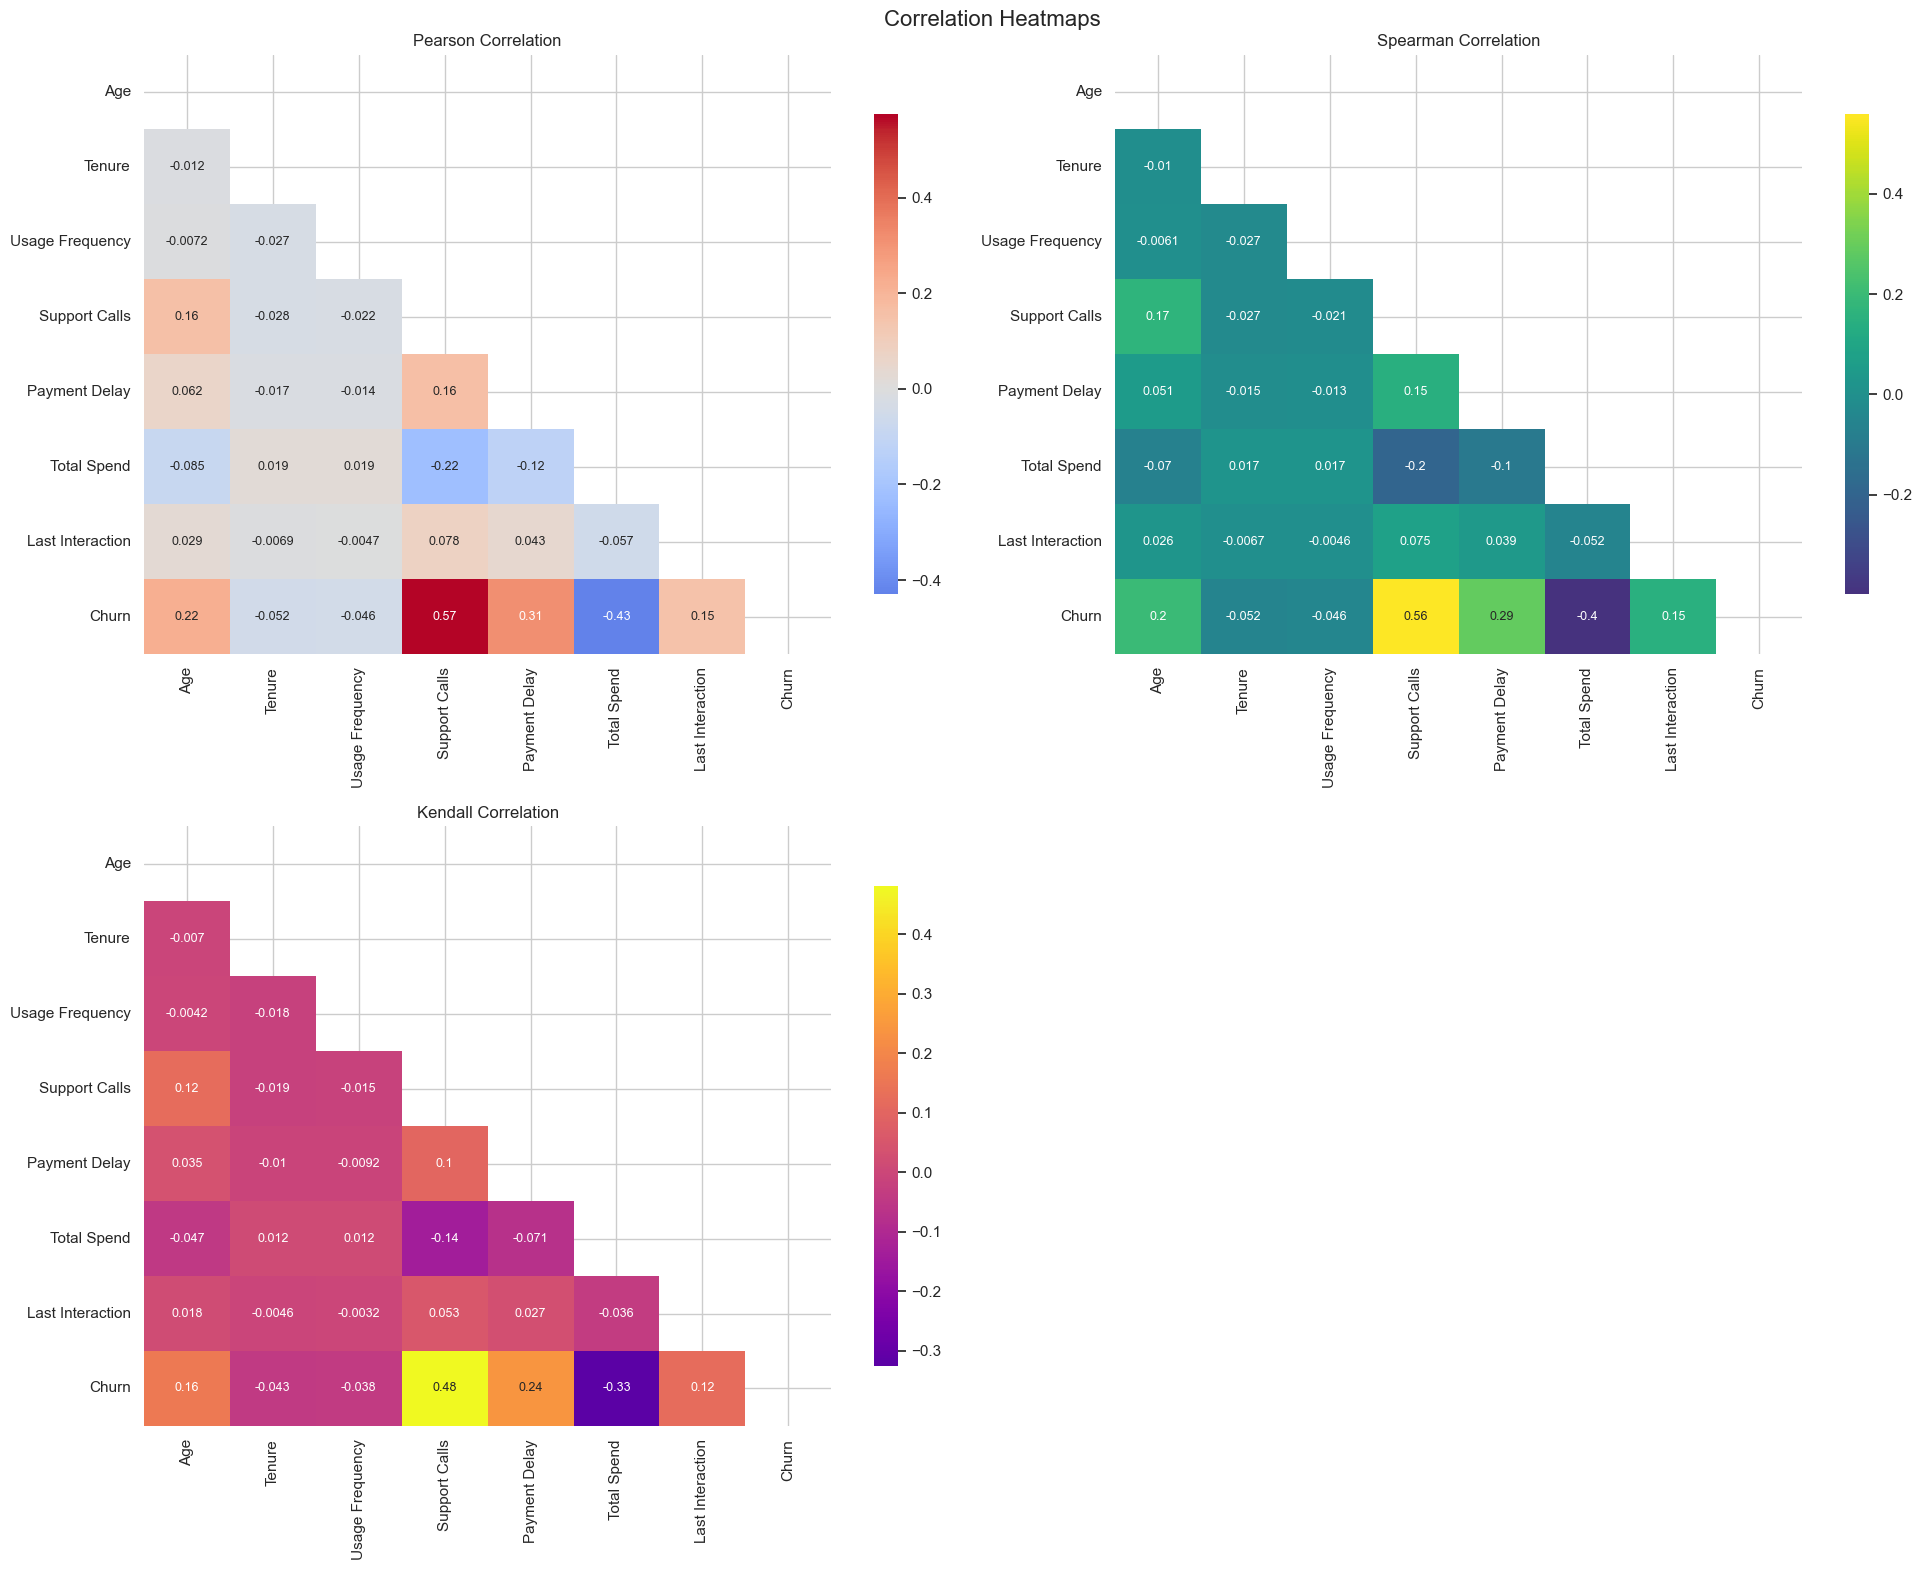

In [24]:
pearson_corr = numerical_colums.corr(method='pearson')
spearman_corr = numerical_colums.corr(method='spearman')
kendall_corr = numerical_colums.corr(method='kendall')

utils.graph_correlations(
    pearson_corr, 
    spearman_corr, 
    kendall_corr, 
    title="Correlation Heatmaps", 
    figsize=(20, 16),
    annot_size=9
)

Text(0, 0.5, 'Features')

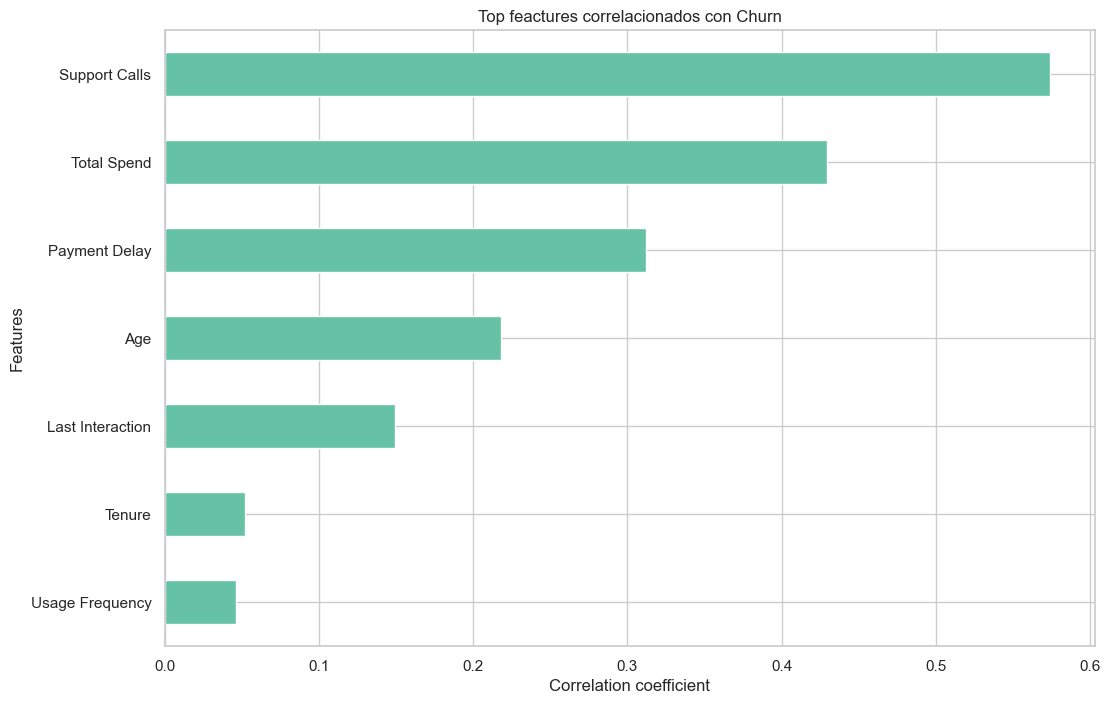

In [25]:
# Crear un top 5 de las correlaciones mas altas en base a nuestra variable objetivo y las graficamos
plt.figure(figsize=(12, 8))
numerical_colums.corr().Churn.apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:11][::-1].plot(kind='barh') 
plt.title("Top feactures correlacionados con Churn")
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")

### **Modeling**

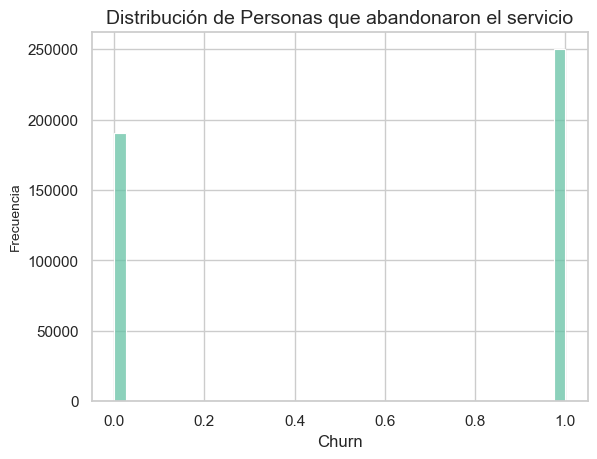

In [26]:
sns.histplot((data_clean['Churn']))
plt.title("Distribución de Personas que abandonaron el servicio", fontsize=14)
plt.ylabel("Frecuencia", fontsize=10) 
plt.show()

In [27]:
data_clean.head(10)

,Gender,Subscription Type,Contract Length,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
0,Female,Standard,Annual,30,39,14,5,18,932.0,17,True
1,Female,Basic,Monthly,65,49,1,10,8,557.0,6,True
2,Female,Basic,Quarterly,55,14,4,6,18,185.0,3,True
3,Male,Standard,Monthly,58,38,21,7,7,396.0,29,True
4,Male,Basic,Monthly,23,32,20,5,8,617.0,20,True
5,Male,Premium,Annual,51,33,25,9,26,129.0,8,True
6,Female,Standard,Quarterly,58,49,12,3,16,821.0,24,True
7,Female,Premium,Annual,55,37,8,4,15,445.0,30,True
8,Male,Standard,Quarterly,39,12,5,7,4,969.0,13,True
9,Female,Standard,Quarterly,64,3,25,2,11,415.0,29,True


In [28]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Gender             440832 non-null  category
 1   Subscription Type  440832 non-null  category
 2   Contract Length    440832 non-null  category
 3   Age                440832 non-null  int32   
 4   Tenure             440832 non-null  int32   
 5   Usage Frequency    440832 non-null  int32   
 6   Support Calls      440832 non-null  int32   
 7   Payment Delay      440832 non-null  int32   
 8   Total Spend        440832 non-null  float64 
 9   Last Interaction   440832 non-null  int32   
 10  Churn              440832 non-null  bool    
dtypes: bool(1), category(3), float64(1), int32(6)
memory usage: 18.5 MB


Dado que el dataset es muy grande, decido tomar muestras del 20% del total

##### **Preprocesamiento**

In [29]:
# Variables predictoras
predict_numeric = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Last Interaction']
ordinal_columns = ["Subscription Type"]
onehot_columns = ["Gender", "Contract Length"]

# Variable objetivo
output = "Churn"

# Preparar X e y
X = data_clean[[*predict_numeric] + [*ordinal_columns] + [*onehot_columns]]
y = data_clean[output]

In [30]:
# Definir los pipelines para cada transformación
scaler = Pipeline(steps=[
    ("scaler", StandardScaler())
])

ordinal = Pipeline(steps=[
    ("ordinal", OrdinalEncoder())
])

onehot = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Definir el preprocessor principal
preprocessor = ColumnTransformer(
    transformers=[
        ("scaler", scaler, predict_numeric),
        ("ordinal", ordinal, ordinal_columns),
        ("onehot", onehot, onehot_columns),
    ],
    remainder="passthrough"
)

# Aplicar las transformaciones
X_transf = preprocessor.fit_transform(X)

In [31]:
# Convertir a DataFrame con nombres de columnas apropiados
df_transf = pd.DataFrame(X_transf, columns=preprocessor.get_feature_names_out())

# Mostrar información del DataFrame transformado
print("Información del DataFrame transformado:")
df_transf.info()

Información del DataFrame transformado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440832 entries, 0 to 440831
Data columns (total 12 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   scaler__Age                        440832 non-null  float64
 1   scaler__Tenure                     440832 non-null  float64
 2   scaler__Usage Frequency            440832 non-null  float64
 3   scaler__Support Calls              440832 non-null  float64
 4   scaler__Payment Delay              440832 non-null  float64
 5   scaler__Last Interaction           440832 non-null  float64
 6   ordinal__Subscription Type         440832 non-null  float64
 7   onehot__Gender_Female              440832 non-null  float64
 8   onehot__Gender_Male                440832 non-null  float64
 9   onehot__Contract Length_Annual     440832 non-null  float64
 10  onehot__Contract Length_Monthly    440832 non-null  float64
 11 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
del X_transf
del df_transf

#### **XGBoost Classifier**

In [34]:
pipeline_xb = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", xgb.XGBClassifier(eval_metric='logloss', random_state=42))
])

pipeline_xb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Tenure',
                                                   'Usage Frequency',
                                                   'Support Calls',
                                                   'Payment Delay',
                                                   'Last Interaction']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Subscription Type']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotE...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [35]:
y_pred_xb = pipeline_xb.predict(X_test)

classification_report_xb = classification_report(y_test, y_pred_xb)
conf_matrix_xb = confusion_matrix(y_test, y_pred_xb)
acuracy_xb = accuracy_score(y_test, y_pred_xb)
print("Accuracy XBoost:", acuracy_xb)
print("Repote Clasificación Árbol de XBoost")
print(classification_report_xb)

Accuracy XBoost: 0.9796143667296786
Repote Clasificación Árbol de XBoost
              precision    recall  f1-score   support

       False       0.95      1.00      0.98     57160
        True       1.00      0.96      0.98     75090

    accuracy                           0.98    132250
   macro avg       0.98      0.98      0.98    132250
weighted avg       0.98      0.98      0.98    132250



##### **Confussion Matrix**

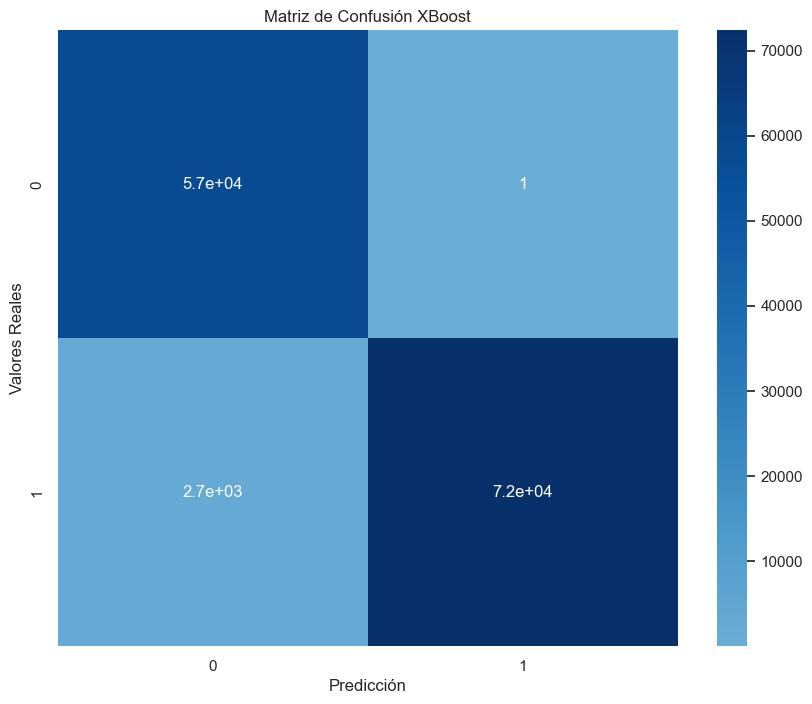

In [36]:
_, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.heatmap(
    conf_matrix_xb,
    annot=True,
    cmap='Blues',
    center=0,
    ax=ax1,
)

ax1.set_xlabel("Predicción")
ax1.set_ylabel("Valores Reales")
ax1.set_xticks(ticks=ax1.get_xticks())
ax1.set_yticks(ticks=ax1.get_yticks())
plt.title("Matriz de Confusión XBoost")
plt.show()

##### **Curva ROC**

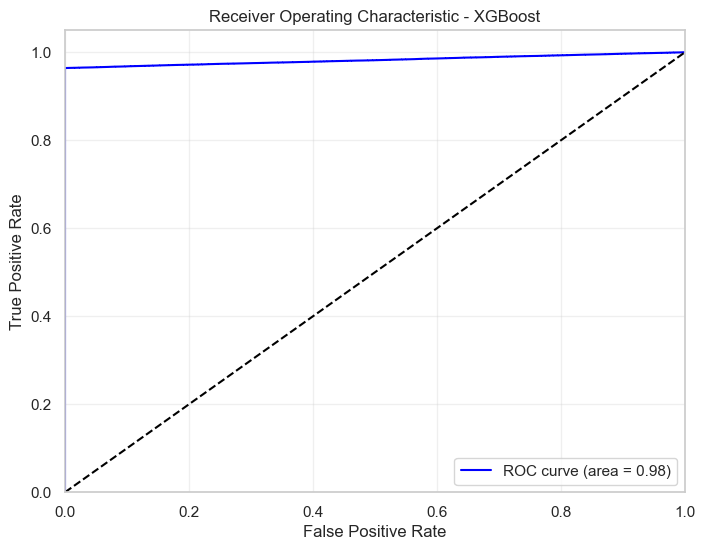

In [37]:
# Curva ROC y AUC
y_prob_xb = pipeline_xb.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

fpr, tpr, thresholds = roc_curve(y_test, y_prob_xb)
auc_xb = roc_auc_score(y_test, y_prob_xb)

# Plotear la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_xb, color='blue')
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - XGBoost')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

##### **Hiperparametros con RandomizedSearchCV**

In [38]:
# Definir el pipeline con RandomizedSearchCV
xb_rscv = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomizedSearchCV(
        xgb.XGBClassifier(eval_metric='logloss', random_state=42),
        param_distributions={
            'n_estimators': [20, 50, 80], # Número de árboles (estimadores) que XGBoost va a usar en el modelo
            'max_depth': [3, 5, 7, 10], # Profundidad máxima de cada árbol, controla la complejidad del modelo
            'learning_rate': [0.01, 0.1, 0.2], # Tasa de aprendizaje, controla el tamaño de cada paso en el ajuste de los árboles
            'subsample': [0.7, 0.8, 0.9, 1.0], # Proporción de muestras a utilizar para cada árbol, ayuda a evitar el sobreajuste
            'colsample_bytree': [0.7, 0.8, 0.9, 1.0] # Proporción de características a considerar para cada árbol
        },
        n_iter=20, # Número de combinaciones aleatorias de hiperparámetros a probar
        cv=3, # Número de pliegues para validación cruzada, determina cómo se divide el conjunto de entrenamiento
        verbose=2, # Nivel de verbosidad, determina qué tanta información se muestra durante el entrenamiento
        refit=True, # Vuelve a entrenar el modelo con los mejores hiperparámetros encontrados
        random_state=42, # Semilla para la generación de números aleatorios, asegura reproducibilidad
        n_jobs=-1 # Número de trabajos paralelos a utilizar, -1 usa todos los núcleos disponibles
    )),
])

# Ajustar el modelo con los datos de entrenamiento
xb_rscv.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Tenure',
                                                   'Usage Frequency',
                                                   'Support Calls',
                                                   'Payment Delay',
                                                   'Last Interaction']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Subscription Type']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotE...
                                                            missing=nan,
                                                            monotone_constraints=None,
                                                            multi_strategy=None,
                                                            n_estimators=None,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            random_state=42, ...),
                                    n_iter=20, n_jobs=-1,
                                    param_distributions={'colsample_bytree': [0.7,
                                                                              0.8,
                                                                              0.9,
                                                                              1.0],
                                                         'learning_rate': [0.01,
                                                                           0.1,
                                                                           0.2],
                                                         'max_depth': [3, 5, 7,
                                                                       10],
                                                         'n_estimators': [20,
                                                                          50,
                                                                          80],
                                                         'subsample': [0.7, 0.8,
                                                                       0.9,
                                                                       1.0]},
                                    random_state=42, verbose=2))])

##### **Metricas de RandomizedSearchCV**

In [39]:
# Realizar las predicciones directamente usando el pipeline ajustado
y_pred_xb_optimized = xb_rscv.predict(X_test)
y_proba_xb_optimized = xb_rscv.predict_proba(X_test)

accuracy_ab_optimized = accuracy_score(y_test, y_pred_xb_optimized)
precision_ab_optimized = precision_score(y_test, y_pred_xb_optimized)
recall_xb_optimized = recall_score(y_test, y_pred_xb_optimized)
f1_xb_optimized = f1_score(y_test, y_pred_xb_optimized)
roc_auc_xb_optimized = roc_auc_score(y_test, y_proba_xb_optimized[:, 1])

# Imprimir los resultados
print(f"Accuracy XGBoost Optimizado: {accuracy_ab_optimized}")
print(f"Precision XGBoost Optimizado: {precision_ab_optimized}")
print(f"Recall XGBoost Optimizado: {recall_xb_optimized}")
print(f"F1 XGBoost Optimizado: {f1_xb_optimized}")
print(f"ROC AUC XGBoost Optimizado: {roc_auc_xb_optimized}")


Accuracy XGBoost Optimizado: 0.9796143667296786
Precision XGBoost Optimizado: 1.0
Recall XGBoost Optimizado: 0.9640964176321747
F1 XGBoost Optimizado: 0.9817200509885818
ROC AUC XGBoost Optimizado: 0.9821723444346374


#### **Adaboost Classifier**

In [40]:
pipeline_ab = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", AdaBoostClassifier(algorithm='SAMME',random_state=42))
])

pipeline_ab.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Tenure',
                                                   'Usage Frequency',
                                                   'Support Calls',
                                                   'Payment Delay',
                                                   'Last Interaction']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Subscription Type']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender',
                                                   'Contract Length'])])),
                ('model',
                 AdaBoostClassifier(algorithm='SAMME', random_state=42))])

In [41]:
y_pred_ab = pipeline_ab.predict(X_test)

classification_report_ab = classification_report(y_test, y_pred_ab)
conf_matrix_ab = confusion_matrix(y_test, y_pred_ab)
acuracy_ab = accuracy_score(y_test, y_pred_ab)
print("Accuracy AdaBoost:", acuracy_ab)
print("Reporte Clasificación AdaBoost")
print(classification_report_ab)

Accuracy AdaBoost: 0.9410132325141777
Reporte Clasificación AdaBoost
              precision    recall  f1-score   support

       False       0.88      0.99      0.94     57160
        True       0.99      0.90      0.95     75090

    accuracy                           0.94    132250
   macro avg       0.94      0.95      0.94    132250
weighted avg       0.95      0.94      0.94    132250



##### **Confussion Matrix**

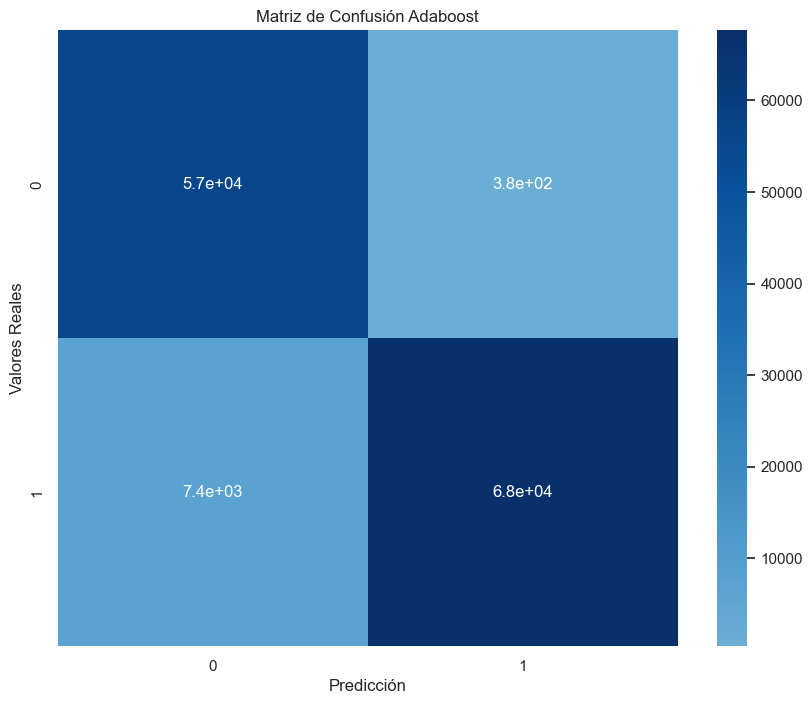

In [42]:
_, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.heatmap(
    conf_matrix_ab,
    annot=True,
    cmap='Blues',
    center=0,
    ax=ax1,
)

ax1.set_xlabel("Predicción")
ax1.set_ylabel("Valores Reales")
ax1.set_xticks(ticks=ax1.get_xticks())
ax1.set_yticks(ticks=ax1.get_yticks())
plt.title("Matriz de Confusión Adaboost")
plt.show()

##### **Curva ROC**

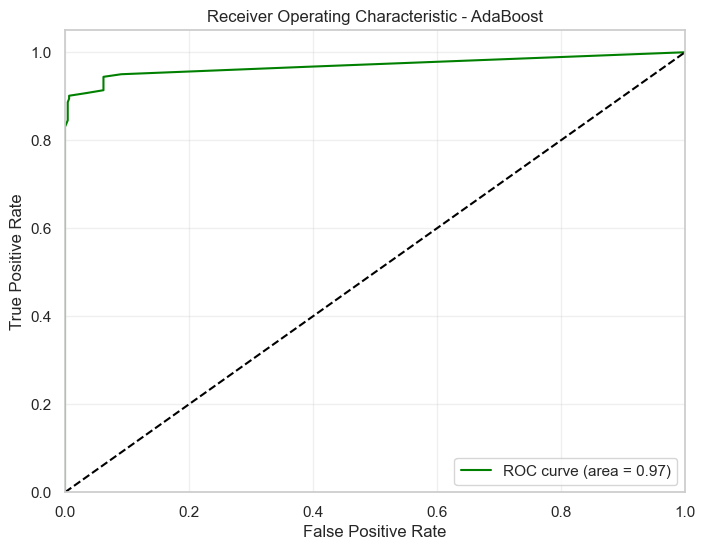

In [43]:
# Curva ROC y AUC para AdaBoost
y_prob_ab = pipeline_ab.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

fpr, tpr, thresholds = roc_curve(y_test, y_prob_ab)
auc_ab = roc_auc_score(y_test, y_prob_ab)

# Plotear la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_ab, color='green')
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - AdaBoost')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


##### **Metricas de RandomizedSearchCV**

In [44]:
# Definir el pipeline con RandomizedSearchCV para AdaBoost
ab_rscv = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomizedSearchCV(
        AdaBoostClassifier(random_state=42),
        param_distributions={
            'n_estimators': [20, 50, 80],  # Número de estimadores (árboles) a usar
            'learning_rate': [0.01, 0.1, 0.5],  # Tasa de aprendizaje
            'algorithm': ['SAMME']  # Algoritmo de AdaBoost (SAMME o SAMME.R)
        },
        n_iter=9,  # Número de combinaciones aleatorias de hiperparámetros a probar
        cv=2,  # Número de pliegues para validación cruzada
        verbose=2,  # Nivel de verbosidad
        refit=True,  # Reentrenar el modelo con los mejores hiperparámetros encontrados
        random_state=42,  # Semilla para asegurar la reproducibilidad
        n_jobs=-1  # Número de trabajos paralelos a utilizar
    )),
])

# Ajustar el modelo con los datos de entrenamiento
ab_rscv.fit(X_train, y_train)


Fitting 2 folds for each of 9 candidates, totalling 18 fits


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Tenure',
                                                   'Usage Frequency',
                                                   'Support Calls',
                                                   'Payment Delay',
                                                   'Last Interaction']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Subscription Type']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender',
                                                   'Contract Length'])])),
                ('model',
                 RandomizedSearchCV(cv=2,
                                    estimator=AdaBoostClassifier(random_state=42),
                                    n_iter=9, n_jobs=-1,
                                    param_distributions={'algorithm': ['SAMME'],
                                                         'learning_rate': [0.01,
                                                                           0.1,
                                                                           0.5],
                                                         'n_estimators': [20,
                                                                          50,
                                                                          80]},
                                    random_state=42, verbose=2))])

In [45]:
# Realizar las predicciones directamente usando el pipeline ajustado
y_pred_ab_optimized = ab_rscv.predict(X_test)
y_proba_ab_optimized = ab_rscv.predict_proba(X_test)

accuracy_ab_optimized = accuracy_score(y_test, y_pred_ab_optimized)
precision_ab_optimized = precision_score(y_test, y_pred_ab_optimized)
recall_ab_optimized = recall_score(y_test, y_pred_ab_optimized)
f1_ab_optimized = f1_score(y_test, y_pred_ab_optimized)
roc_auc_ab_optimized = roc_auc_score(y_test, y_proba_ab_optimized[:, 1])

# Imprimir los resultados
print(f"Accuracy AdaBoost Optimizado: {accuracy_ab_optimized}")
print(f"Precision AdaBoost Optimizado: {precision_ab_optimized}")
print(f"Recall AdaBoost Optimizado: {recall_ab_optimized}")
print(f"F1 AdaBoost Optimizado: {f1_ab_optimized}")
print(f"ROC AUC AdaBoost Optimizado: {roc_auc_ab_optimized}")


Accuracy AdaBoost Optimizado: 0.93717202268431
Precision AdaBoost Optimizado: 0.9943884274271162
Recall AdaBoost Optimizado: 0.8943933945931549
F1 AdaBoost Optimizado: 0.9417439651122843
ROC AUC AdaBoost Optimizado: 0.9537460040952956


#### **Random Forest Classifier**

In [46]:
pipeline_rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(random_state=42))
])

pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Tenure',
                                                   'Usage Frequency',
                                                   'Support Calls',
                                                   'Payment Delay',
                                                   'Last Interaction']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Subscription Type']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender',
                                                   'Contract Length'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [47]:
y_pred_rf = pipeline_rf.predict(X_test)

classification_report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
acuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy Random Forest:", acuracy_rf)
print("Reporte Clasificación Random Forest")
print(classification_report_rf)

Accuracy Random Forest: 0.979296786389414
Reporte Clasificación Random Forest
              precision    recall  f1-score   support

       False       0.95      1.00      0.98     57160
        True       1.00      0.96      0.98     75090

    accuracy                           0.98    132250
   macro avg       0.98      0.98      0.98    132250
weighted avg       0.98      0.98      0.98    132250



##### **Confussion Matrix**

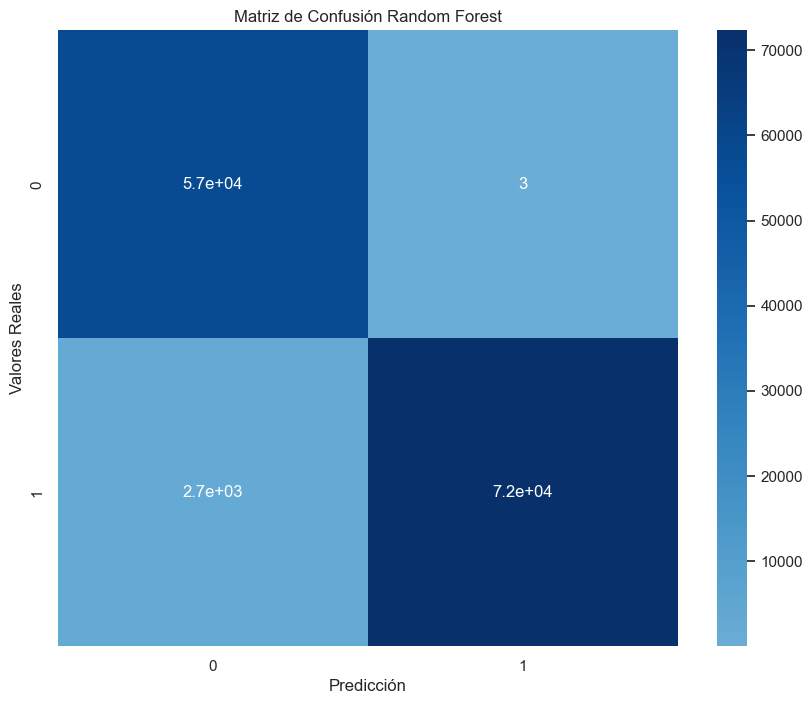

In [48]:
_, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.heatmap(
    conf_matrix_rf,
    annot=True,
    cmap='Blues',
    center=0,
    ax=ax1,
)

ax1.set_xlabel("Predicción")
ax1.set_ylabel("Valores Reales")
ax1.set_xticks(ticks=ax1.get_xticks())
ax1.set_yticks(ticks=ax1.get_yticks())
plt.title("Matriz de Confusión Random Forest")
plt.show()

##### **Curva ROC**

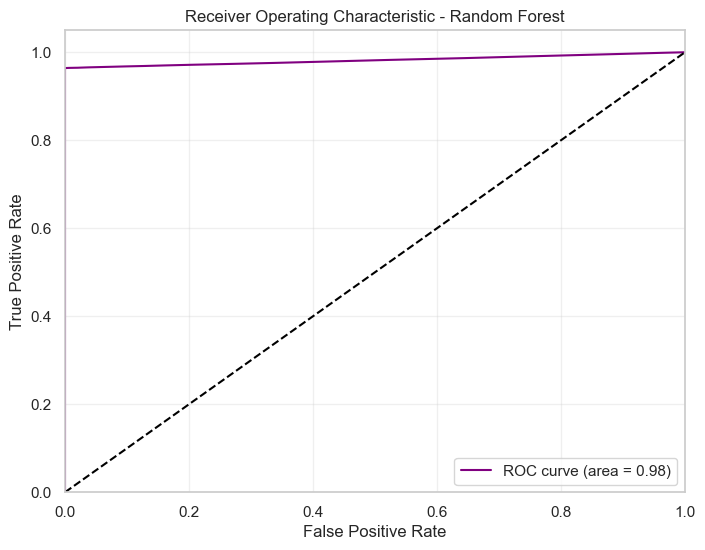

In [49]:
# Curva ROC y AUC para Random Forest
y_prob_rf = pipeline_rf.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

# Plotear la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_rf, color='purple')
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


##### **Metricas de RandomizedSearchCV**

In [50]:
# Definir el pipeline con RandomizedSearchCV para RandomForest
rf_rscv = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomizedSearchCV(
        RandomForestClassifier(random_state=42),
        param_distributions={
            'n_estimators': [20, 50, 80],  # Número de árboles (estimadores) en el bosque
            'max_depth': [None, 10, 20, 30],  # Profundidad máxima de cada árbol
            'min_samples_split': [2, 5, 10],  # Mínimo número de muestras para dividir un nodo
            'min_samples_leaf': [1, 2, 4],  # Mínimo número de muestras para ser una hoja
            'max_features': ['sqrt', 'log2', None],  # Valores válidos para max_features
            'bootstrap': [True, False]  # Si se utiliza muestreo con reemplazo en los árboles
        },
        n_iter=20,  # Número de combinaciones aleatorias de hiperparámetros a probar
        cv=2,  # Número de pliegues para validación cruzada
        verbose=2,  # Nivel de verbosidad
        refit=True,  # Reentrenar el modelo con los mejores hiperparámetros encontrados
        random_state=42,  # Semilla para asegurar la reproducibilidad
        n_jobs=-1  # Número de trabajos paralelos a utilizar
    )),
])

# Ajustar el modelo con los datos de entrenamiento
rf_rscv.fit(X_train, y_train)


Fitting 2 folds for each of 20 candidates, totalling 40 fits


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Tenure',
                                                   'Usage Frequency',
                                                   'Support Calls',
                                                   'Payment Delay',
                                                   'Last Interaction']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Subscription Type']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotE...
                                                  ['Gender',
                                                   'Contract Length'])])),
                ('model',
                 RandomizedSearchCV(cv=2,
                                    estimator=RandomForestClassifier(random_state=42),
                                    n_iter=20, n_jobs=-1,
                                    param_distributions={'bootstrap': [True,
                                                                       False],
                                                         'max_depth': [None, 10,
                                                                       20, 30],
                                                         'max_features': ['sqrt',
                                                                          'log2',
                                                                          None],
                                                         'min_samples_leaf': [1,
                                                                              2,
                                                                              4],
                                                         'min_samples_split': [2,
                                                                               5,
                                                                               10],
                                                         'n_estimators': [20,
                                                                          50,
                                                                          80]},
                                    random_state=42, verbose=2))])

In [51]:
# Realizar las predicciones directamente usando el pipeline ajustado
y_pred_rf_optimized = rf_rscv.predict(X_test)
y_proba_rf_optimized = rf_rscv.predict_proba(X_test)

accuracy_rf_optimized = accuracy_score(y_test, y_pred_rf_optimized)
precision_rf_optimized = precision_score(y_test, y_pred_rf_optimized)
recall_rf_optimized = recall_score(y_test, y_pred_rf_optimized)
f1_rf_optimized = f1_score(y_test, y_pred_rf_optimized)
roc_auc_rf_optimized = roc_auc_score(y_test, y_proba_rf_optimized[:, 1])

# Imprimir los resultados
print(f"Accuracy RandomForest Optimizado: {accuracy_rf_optimized}")
print(f"Precision RandomForest Optimizado: {precision_rf_optimized}")
print(f"Recall RandomForest Optimizado: {recall_rf_optimized}")
print(f"F1 RandomForest Optimizado: {f1_rf_optimized}")
print(f"ROC AUC RandomForest Optimizado: {roc_auc_rf_optimized}")


Accuracy RandomForest Optimizado: 0.9794933837429112
Precision RandomForest Optimizado: 0.9999585543766578
Recall RandomForest Optimizado: 0.9639232920495405
F1 RandomForest Optimizado: 0.9816103177509256
ROC AUC RandomForest Optimizado: 0.982160923453554


#### **GradientBoost Classifier**

In [52]:
pipeline_gb = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", GradientBoostingClassifier(random_state=42))
])

pipeline_gb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Tenure',
                                                   'Usage Frequency',
                                                   'Support Calls',
                                                   'Payment Delay',
                                                   'Last Interaction']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Subscription Type']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender',
                                                   'Contract Length'])])),
                ('model', GradientBoostingClassifier(random_state=42))])

In [53]:
y_pred_gb = pipeline_gb.predict(X_test)

classification_report_gb = classification_report(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
accuracy_score_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy Gradient Boosting:", accuracy_score_gb)
print("Reporte Clasificación Gradient Boosting")
print(classification_report_gb)

Accuracy Gradient Boosting: 0.9787145557655955
Reporte Clasificación Gradient Boosting
              precision    recall  f1-score   support

       False       0.95      1.00      0.98     57160
        True       1.00      0.96      0.98     75090

    accuracy                           0.98    132250
   macro avg       0.98      0.98      0.98    132250
weighted avg       0.98      0.98      0.98    132250



##### **Confussion Matrix**

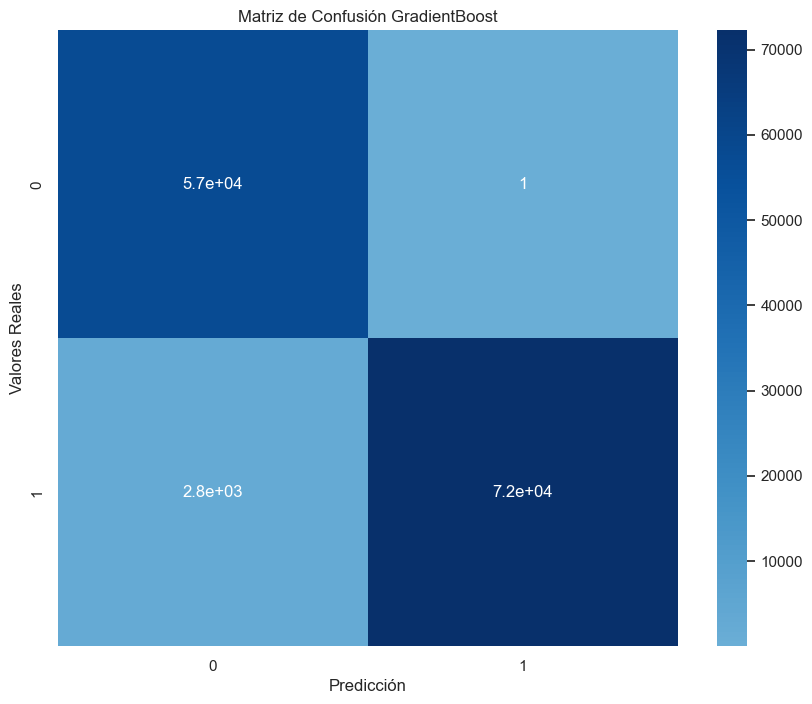

In [54]:
_, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.heatmap(
    conf_matrix_gb,
    annot=True,
    cmap='Blues',
    center=0,
    ax=ax1,
)

ax1.set_xlabel("Predicción")
ax1.set_ylabel("Valores Reales")
ax1.set_xticks(ticks=ax1.get_xticks())
ax1.set_yticks(ticks=ax1.get_yticks())
plt.title("Matriz de Confusión GradientBoost")
plt.show()

##### **Curva ROC**

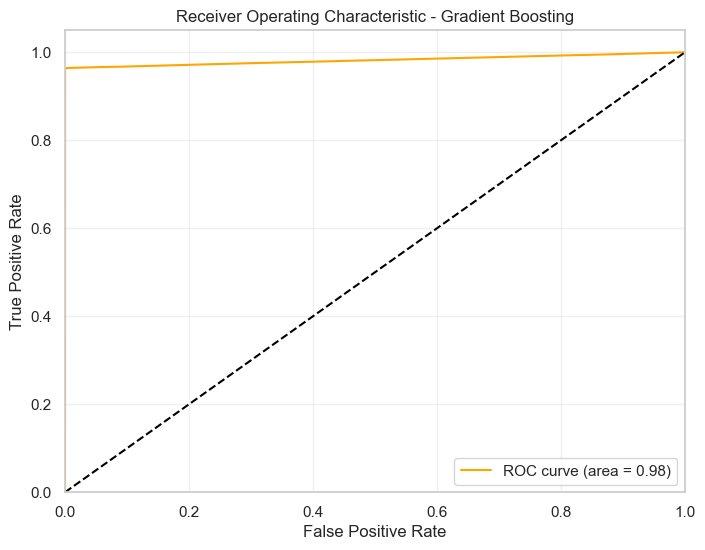

In [55]:
# Curva ROC y AUC para Gradient Boosting
y_prob_gb = pipeline_gb.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

fpr, tpr, thresholds = roc_curve(y_test, y_prob_gb)
auc_gb = roc_auc_score(y_test, y_prob_gb)

# Plotear la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_gb, color='orange')
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Gradient Boosting')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


##### **Metricas de RandomizedSearchCV**

In [56]:
# Definir el pipeline con RandomizedSearchCV para GradientBoosting
gb_rscv = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomizedSearchCV(
        GradientBoostingClassifier(random_state=42),
        param_distributions={
            'n_estimators': [20, 50, 80],  # Número de árboles en el modelo
            'learning_rate': [0.01, 0.1, 0.2],  # Tasa de aprendizaje
            'max_depth': [3, 5, 7, 10],  # Profundidad máxima de los árboles
            'min_samples_split': [2, 5, 10],  # Mínimo número de muestras para dividir un nodo
            'min_samples_leaf': [1, 2, 4],  # Mínimo número de muestras en una hoja
            'subsample': [0.7, 0.8, 0.9, 1.0],  # Proporción de muestras para entrenar cada árbol
            'max_features': ['None', 'sqrt', 'log2'],  # Número de características para dividir
        },
        n_iter=20,  # Número de combinaciones aleatorias de hiperparámetros a probar
        cv=2,  # Número de pliegues para validación cruzada
        verbose=2,  # Nivel de verbosidad
        refit=True,  # Reentrenar el modelo con los mejores hiperparámetros encontrados
        random_state=42,  # Semilla para asegurar la reproducibilidad
        n_jobs=-1  # Número de trabajos paralelos a utilizar
    )),
])

# Ajustar el modelo con los datos de entrenamiento
gb_rscv.fit(X_train, y_train)


Fitting 2 folds for each of 20 candidates, totalling 40 fits


c:\Users\guill\anaconda3\envs\mitic\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
6 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\guill\anaconda3\envs\mitic\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\guill\anaconda3\envs\mitic\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\guill\anaconda3\envs\mitic\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Tenure',
                                                   'Usage Frequency',
                                                   'Support Calls',
                                                   'Payment Delay',
                                                   'Last Interaction']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Subscription Type']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotE...
                 RandomizedSearchCV(cv=2,
                                    estimator=GradientBoostingClassifier(random_state=42),
                                    n_iter=20, n_jobs=-1,
                                    param_distributions={'learning_rate': [0.01,
                                                                           0.1,
                                                                           0.2],
                                                         'max_depth': [3, 5, 7,
                                                                       10],
                                                         'max_features': ['None',
                                                                          'sqrt',
                                                                          'log2'],
                                                         'min_samples_leaf': [1,
                                                                              2,
                                                                              4],
                                                         'min_samples_split': [2,
                                                                               5,
                                                                               10],
                                                         'n_estimators': [20,
                                                                          50,
                                                                          80],
                                                         'subsample': [0.7, 0.8,
                                                                       0.9,
                                                                       1.0]},
                                    random_state=42, verbose=2))])

In [57]:
# Realizar las predicciones directamente usando el pipeline ajustado
y_pred_gb_optimized = gb_rscv.predict(X_test)
y_proba_gb_optimized = gb_rscv.predict_proba(X_test)

accuracy_gb_optimized = accuracy_score(y_test, y_pred_gb_optimized)
precision_gb_optimized = precision_score(y_test, y_pred_gb_optimized)
recall_gb_optimized = recall_score(y_test, y_pred_gb_optimized)
f1_gb_optimized = f1_score(y_test, y_pred_gb_optimized)
roc_auc_gb_optimized = roc_auc_score(y_test, y_proba_gb_optimized[:, 1])

# Imprimir los resultados
print(f"Accuracy RandomForest Optimizado: {accuracy_gb_optimized}")
print(f"Precision RandomForest Optimizado: {precision_gb_optimized}")
print(f"Recall RandomForest Optimizado: {recall_gb_optimized}")
print(f"F1 RandomForest Optimizado: {f1_gb_optimized}")
print(f"ROC AUC RandomForest Optimizado: {roc_auc_gb_optimized}")


Accuracy RandomForest Optimizado: 0.978593572778828
Precision RandomForest Optimizado: 1.0
Recall RandomForest Optimizado: 0.9622985750432814
F1 RandomForest Optimizado: 0.9807871108728258
ROC AUC RandomForest Optimizado: 0.982121453206467


#### **Logistic Regression**

In [58]:
pipeline_lr = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(random_state=42))
])

pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Tenure',
                                                   'Usage Frequency',
                                                   'Support Calls',
                                                   'Payment Delay',
                                                   'Last Interaction']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Subscription Type']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender',
                                                   'Contract Length'])])),
                ('model', LogisticRegression(random_state=42))])

In [59]:
y_pred_lr = pipeline_lr.predict(X_test)

classification_report_lr = classification_report(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy Regresión Logística:", accuracy_lr)
print("Reporte Clasificación Regresión Logística")
print(classification_report_lr)

Accuracy Regresión Logística: 0.8618601134215501
Reporte Clasificación Regresión Logística
              precision    recall  f1-score   support

       False       0.81      0.88      0.85     57160
        True       0.90      0.85      0.87     75090

    accuracy                           0.86    132250
   macro avg       0.86      0.86      0.86    132250
weighted avg       0.86      0.86      0.86    132250



##### **Confussion Matrix**

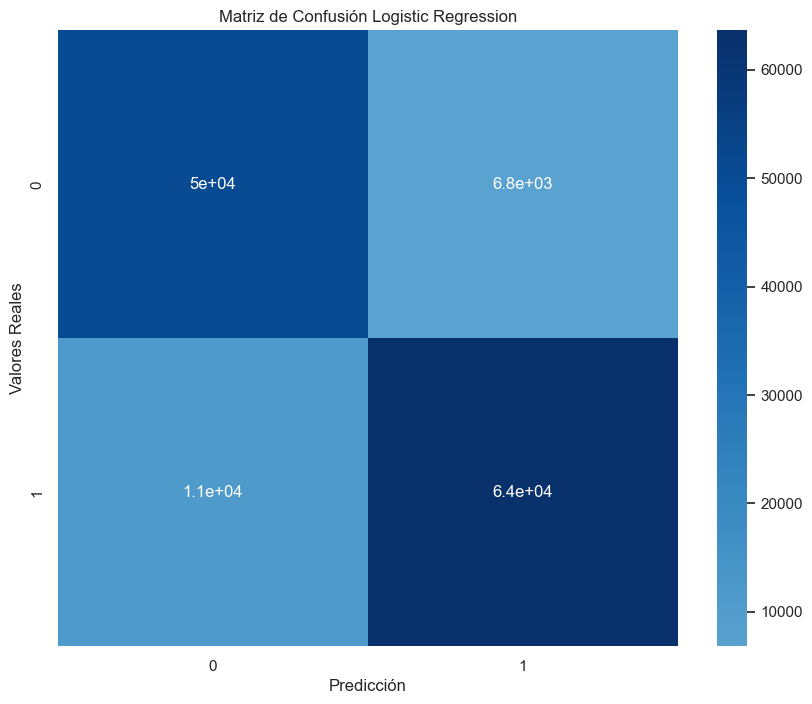

In [60]:
_, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.heatmap(
    conf_matrix_lr,
    annot=True,
    cmap='Blues',
    center=0,
    ax=ax1,
)

ax1.set_xlabel("Predicción")
ax1.set_ylabel("Valores Reales")
ax1.set_xticks(ticks=ax1.get_xticks())
ax1.set_yticks(ticks=ax1.get_yticks())
plt.title("Matriz de Confusión Logistic Regression")
plt.show()

##### **Curva ROC**

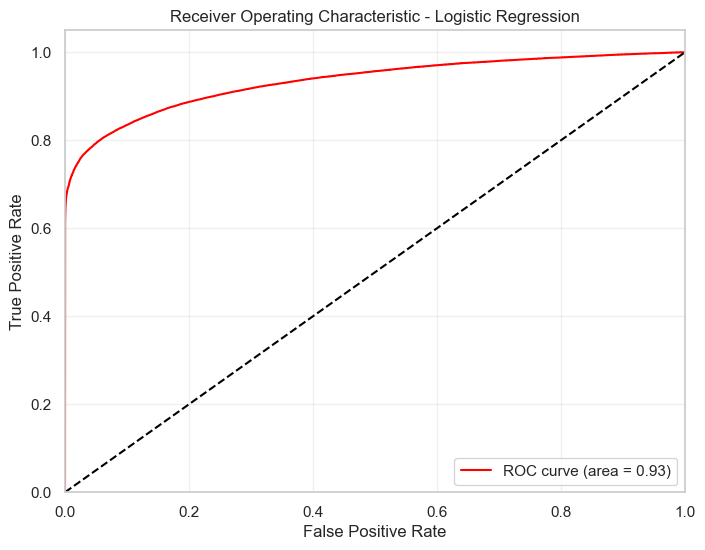

In [61]:
# Curva ROC y AUC para Logistic Regression
y_prob_lr = pipeline_lr.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

# Plotear la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_lr, color='red')
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


##### **Metricas de RandomizedSearchCV**

In [62]:
# Definir el pipeline con RandomizedSearchCV para LogisticRegression
lr_rscv = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomizedSearchCV(
        LogisticRegression(random_state=42, max_iter=100),
        param_distributions={
            'C': [0.01, 0.1, 1, 10, 100],  # Inverso de la regularización, controla la complejidad del modelo
            'penalty': ['l1', 'l2', 'elasticnet'],  # Tipo de penalización: L1, L2 o ElasticNet
            'solver': ['liblinear', 'saga'],  # Algoritmos de optimización para la regresión logística
            'max_iter': [20, 50, 80],  # Número máximo de iteraciones para el algoritmo de optimización
            'tol': [1e-4, 1e-3, 1e-2],  # Tolerancia para el criterio de convergencia
            'class_weight': [None, 'balanced'],  # Manejo del desbalanceo de clases
            'l1_ratio': [0.1, 0.5, 0.7, 1.0]  # Parámetro necesario solo cuando 'penalty' es 'elasticnet'
        },
        n_iter=20,  # Número de combinaciones aleatorias de hiperparámetros a probar
        cv=2,  # Número de pliegues para validación cruzada
        verbose=2,  # Nivel de verbosidad
        refit=True,  # Reentrenar el modelo con los mejores hiperparámetros encontrados
        random_state=42,  # Semilla para asegurar la reproducibilidad
        n_jobs=-1  # Número de trabajos paralelos a utilizar
    )),
])

# Ajustar el modelo con los datos de entrenamiento
lr_rscv.fit(X_train, y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


c:\Users\guill\anaconda3\envs\mitic\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\guill\anaconda3\envs\mitic\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\guill\anaconda3\envs\mitic\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\guill\anaconda3\envs\mitic\Lib\site-packages\sklearn\linear_model\_lo

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Tenure',
                                                   'Usage Frequency',
                                                   'Support Calls',
                                                   'Payment Delay',
                                                   'Last Interaction']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Subscription Type']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotE...
                                                   'Contract Length'])])),
                ('model',
                 RandomizedSearchCV(cv=2,
                                    estimator=LogisticRegression(random_state=42),
                                    n_iter=20, n_jobs=-1,
                                    param_distributions={'C': [0.01, 0.1, 1, 10,
                                                               100],
                                                         'class_weight': [None,
                                                                          'balanced'],
                                                         'l1_ratio': [0.1, 0.5,
                                                                      0.7,
                                                                      1.0],
                                                         'max_iter': [20, 50,
                                                                      80],
                                                         'penalty': ['l1', 'l2',
                                                                     'elasticnet'],
                                                         'solver': ['liblinear',
                                                                    'saga'],
                                                         'tol': [0.0001, 0.001,
                                                                 0.01]},
                                    random_state=42, verbose=2))])

In [63]:
# Realizar las predicciones directamente usando el pipeline ajustado
y_pred_lr_optimized = lr_rscv.predict(X_test)
y_proba_lr_optimized = lr_rscv.predict_proba(X_test)

accuracy_lr_optimized = accuracy_score(y_test, y_pred_lr_optimized)
precision_lr_optimized = precision_score(y_test, y_pred_lr_optimized)
recall_lr_optimized = recall_score(y_test, y_pred_lr_optimized)
f1_lr_optimized = f1_score(y_test, y_pred_lr_optimized)
roc_auc_lr_optimized = roc_auc_score(y_test, y_proba_lr_optimized[:, 1])

# Imprimir los resultados
print(f"Accuracy RandomForest Optimizado: {accuracy_lr_optimized}")
print(f"Precision RandomForest Optimizado: {precision_lr_optimized}")
print(f"Recall RandomForest Optimizado: {recall_lr_optimized}")
print(f"F1 RandomForest Optimizado: {f1_lr_optimized}")
print(f"ROC AUC RandomForest Optimizado: {roc_auc_lr_optimized}")


Accuracy RandomForest Optimizado: 0.8638790170132326
Precision RandomForest Optimizado: 0.9257756563245824
Recall RandomForest Optimizado: 0.8265281662005594
F1 RandomForest Optimizado: 0.8733413072539224
ROC AUC RandomForest Optimizado: 0.9339591137707297


#### **LightGBM Classifier**

In [64]:
pipeline_lg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", lgb.LGBMClassifier(random_state=42))
])

pipeline_lg.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 174909, number of negative: 133673
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 229
[LightGBM] [Info] Number of data points in the train set: 308582, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.566815 -> initscore=0.268869
[LightGBM] [Info] Start training from score 0.268869


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Tenure',
                                                   'Usage Frequency',
                                                   'Support Calls',
                                                   'Payment Delay',
                                                   'Last Interaction']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Subscription Type']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender',
                                                   'Contract Length'])])),
                ('model', LGBMClassifier(random_state=42))])

In [65]:
y_pred_lg = pipeline_lg.predict(X_test)

classification_report_lg = classification_report(y_test, y_pred_lg)
conf_matrix_lg = confusion_matrix(y_test, y_pred_lg)
print("Reporte Clasificación LightGBM")
print(classification_report_lg)

Reporte Clasificación LightGBM
              precision    recall  f1-score   support

       False       0.95      1.00      0.98     57160
        True       1.00      0.96      0.98     75090

    accuracy                           0.98    132250
   macro avg       0.98      0.98      0.98    132250
weighted avg       0.98      0.98      0.98    132250



##### **Confussion Matrix**

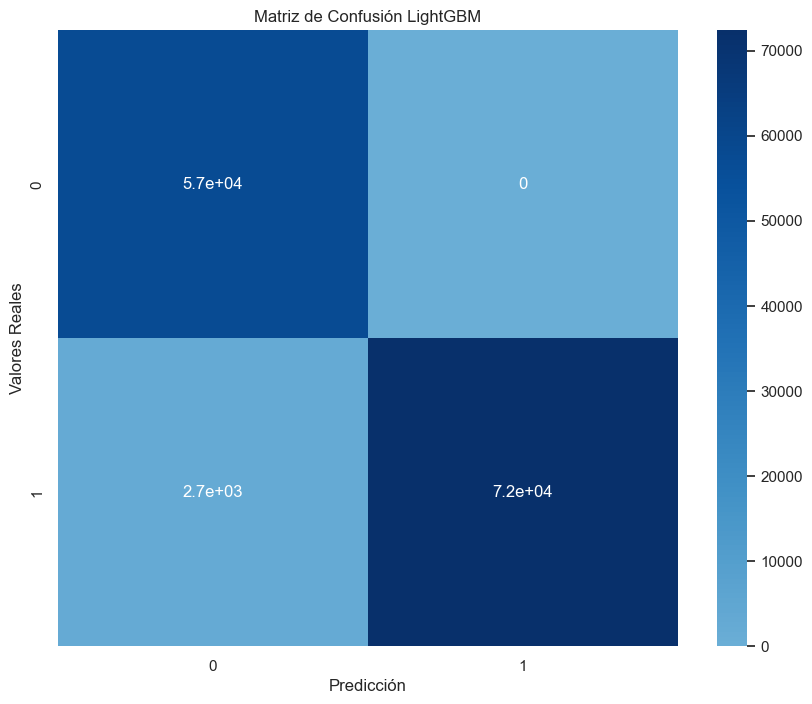

In [66]:
_, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.heatmap(
    conf_matrix_lg,
    annot=True,
    cmap='Blues',
    center=0,
    ax=ax1,
)

ax1.set_xlabel("Predicción")
ax1.set_ylabel("Valores Reales")
ax1.set_xticks(ticks=ax1.get_xticks())
ax1.set_yticks(ticks=ax1.get_yticks())
plt.title("Matriz de Confusión LightGBM")
plt.show()

##### **Curva ROC**

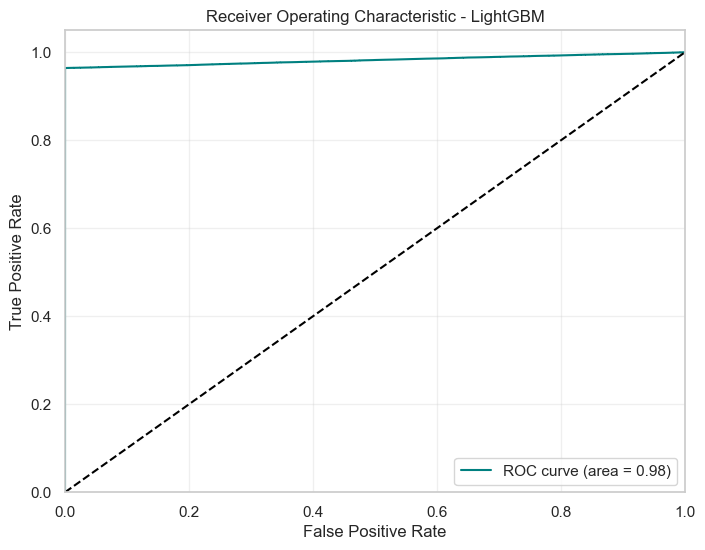

In [67]:
# Curva ROC y AUC para LightGBM
y_prob_lgbm = pipeline_lg.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

fpr, tpr, thresholds = roc_curve(y_test, y_prob_lgbm)
auc_lgbm = roc_auc_score(y_test, y_prob_lgbm)

# Plotear la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_lgbm, color='teal')
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - LightGBM')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


##### **Metricas de RandomizedSearchCV**

In [68]:
# Definir el pipeline con RandomizedSearchCV para LightGBM
lgb_rscv = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomizedSearchCV(
        lgb.LGBMClassifier(random_state=42),
        param_distributions={
            'n_estimators': [20, 50, 80],  # Número de árboles (estimadores)
            'max_depth': [3, 5, 7, 10],  # Profundidad máxima de los árboles
            'learning_rate': [0.01, 0.1, 0.2],  # Tasa de aprendizaje
            'num_leaves': [31, 50, 70],  # Número de hojas por árbol
            'colsample_bytree': [0.7, 0.8, 0.9, 1.0],  # Fracción de columnas para cada árbol
            'subsample': [0.7, 0.8, 0.9, 1.0],  # Fracción de muestras para cada árbol
            'min_child_samples': [10, 20, 50],  # Mínimo número de muestras por hoja
            'reg_alpha': [0.0, 0.1, 1.0],  # Regularización L1
            'reg_lambda': [0.0, 0.1, 1.0],  # Regularización L2
        },
        n_iter=20,  # Número de combinaciones aleatorias de hiperparámetros a probar
        cv=2,  # Número de pliegues para validación cruzada
        verbose=2,  # Nivel de verbosidad
        refit=True,  # Reentrenar el modelo con los mejores hiperparámetros encontrados
        random_state=42,  # Semilla para asegurar la reproducibilidad
        n_jobs=-1  # Número de trabajos paralelos a utilizar
    )),
])

# Ajustar el modelo con los datos de entrenamiento
lgb_rscv.fit(X_train, y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
[LightGBM] [Info] Number of positive: 174909, number of negative: 133673
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.063695 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 229
[LightGBM] [Info] Number of data points in the train set: 308582, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.566815 -> initscore=0.268869
[LightGBM] [Info] Start training from score 0.268869
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Tenure',
                                                   'Usage Frequency',
                                                   'Support Calls',
                                                   'Payment Delay',
                                                   'Last Interaction']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Subscription Type']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotE...
                                    estimator=LGBMClassifier(random_state=42),
                                    n_iter=20, n_jobs=-1,
                                    param_distributions={'colsample_bytree': [0.7,
                                                                              0.8,
                                                                              0.9,
                                                                              1.0],
                                                         'learning_rate': [0.01,
                                                                           0.1,
                                                                           0.2],
                                                         'max_depth': [3, 5, 7,
                                                                       10],
                                                         'min_child_samples': [10,
                                                                               20,
                                                                               50],
                                                         'n_estimators': [20,
                                                                          50,
                                                                          80],
                                                         'num_leaves': [31, 50,
                                                                        70],
                                                         'reg_alpha': [0.0, 0.1,
                                                                       1.0],
                                                         'reg_lambda': [0.0,
                                                                        0.1,
                                                                        1.0],
                                                         'subsample': [0.7, 0.8,
                                                                       0.9,
                                                                       1.0]},
                                    random_state=42, verbose=2))])

In [69]:
# Realizar las predicciones directamente usando el pipeline ajustado
y_pred_lgb_optimized = lgb_rscv.predict(X_test)
y_proba_lgb_optimized = lgb_rscv.predict_proba(X_test)

accuracy_lgb_optimized = accuracy_score(y_test, y_pred_lgb_optimized)
precision_lgb_optimized = precision_score(y_test, y_pred_lgb_optimized)
recall_lgb_optimized = recall_score(y_test, y_pred_lgb_optimized)
f1_lgb_optimized = f1_score(y_test, y_pred_lgb_optimized)
roc_auc_lgb_optimized = roc_auc_score(y_test, y_proba_lgb_optimized[:, 1])

# Imprimir los resultados
print(f"Accuracy RandomForest Optimizado: {accuracy_lgb_optimized}")
print(f"Precision RandomForest Optimizado: {precision_lgb_optimized}")
print(f"Recall RandomForest Optimizado: {recall_lgb_optimized}")
print(f"F1 RandomForest Optimizado: {f1_lgb_optimized}")
print(f"ROC AUC RandomForest Optimizado: {roc_auc_lgb_optimized}")


Accuracy RandomForest Optimizado: 0.9796068052930057
Precision RandomForest Optimizado: 0.9999723745459066
Recall RandomForest Optimizado: 0.964109734984685
F1 RandomForest Optimizado: 0.9817136425583272
ROC AUC RandomForest Optimizado: 0.9823750123597892


#### **Comparacion de Metricas**

In [70]:
# Crear diccionario con todos los modelos y sus predicciones
models_dict = {
    'XGBoost': y_pred_xb,
    'AdaBoost': y_pred_ab,
    'Random Forest': y_pred_rf,
    'Gradient Boosting': y_pred_gb,
    'Logistic Regression': y_pred_lr,
    'LightGBM': y_pred_lg
}

# Crear listas para almacenar las métricas
models = []
accuracy = []
precision = []
recall = []
f1 = []

# Calcular métricas para cada modelo
for name, predictions in models_dict.items():
    models.append(name)
    accuracy.append(accuracy_score(y_test, predictions))
    precision.append(precision_score(y_test, predictions))
    recall.append(recall_score(y_test, predictions))
    f1.append(f1_score(y_test, predictions))

# Crear DataFrame con los resultados
results_df = pd.DataFrame({
    'Modelo': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

# Formatear los valores numéricos a porcentajes
cols_to_format = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
results_df[cols_to_format] = results_df[cols_to_format].apply(lambda x: round(x * 100, 2))

# Ordenar por accuracy descendente
results_df = results_df.sort_values('Accuracy', ascending=False)

# Mostrar resultados
print("\nComparación de Modelos (valores en %):")
print(results_df.to_string(index=False))

# Si quieres guardar los resultados en un archivo CSV
# results_df.to_csv('comparacion_modelos.csv', index=False)


Comparación de Modelos (valores en %):
             Modelo  Accuracy  Precision  Recall  F1 Score
            XGBoost     97.96     100.00   96.41     98.17
           LightGBM     97.96     100.00   96.40     98.17
      Random Forest     97.93     100.00   96.36     98.14
  Gradient Boosting     97.87     100.00   96.25     98.09
           AdaBoost     94.10      99.44   90.12     94.55
Logistic Regression     86.19      90.32   84.75     87.45


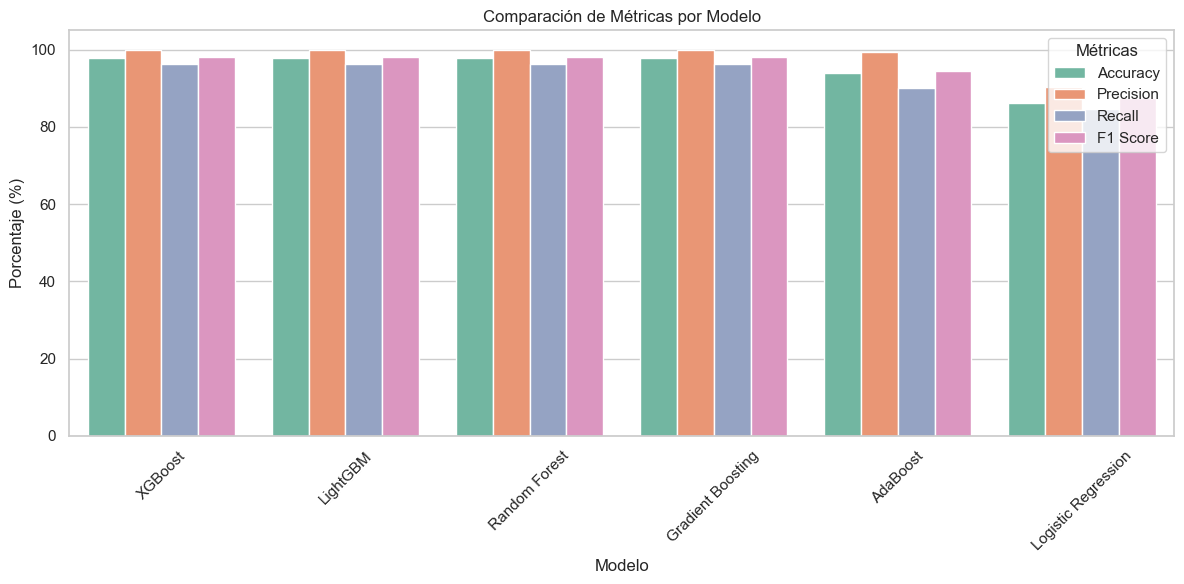

In [71]:
# Configurar el estilo
plt.figure(figsize=(12, 6))

# Convertir el DataFrame para la visualización
results_plot = results_df.melt(id_vars=['Modelo'], 
                             value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                             var_name='Métrica', 
                             value_name='Porcentaje')

# Crear el gráfico de barras agrupadas
sns.barplot(x='Modelo', y='Porcentaje', hue='Métrica', data=results_plot)

plt.title('Comparación de Métricas por Modelo')
plt.xticks(rotation=45)
plt.ylabel('Porcentaje (%)')
plt.legend(title='Métricas')

# Ajustar el layout
plt.tight_layout()
plt.show()

Los resultados muestran que ***XGBoost*** y ***LightGBM*** se destacan como los modelos más precisos para este dataset, con una Accuracy del 97.96%, una Precision perfecta del 100%, un Recall del 96.41% y un F1 Score de 98.17%. Estas métricas reflejan un excelente equilibrio entre precisión y sensibilidad, lo que sugiere que ambos modelos manejan adecuadamente tanto los casos positivos como negativos. La ligera ventaja en Recall indica que son capaces de identificar correctamente la mayoría de las instancias positivas en el dataset.

El **Random Forest** y el **Gradient Boosting** también presentan resultados competitivos, con precisiones ligeramente inferiores (97.93% y 97.87%, respectivamente) y métricas de Recall y F1 Score marginalmente más bajas en comparación con ***XGBoost*** y ***LightGBM***. Estos modelos son buenas alternativas si se busca una arquitectura más sencilla, pero no alcanzan el mismo nivel de desempeño global.

Por otro lado, **AdaBoost**, aunque muestra una Precision alta del 99.44%, presenta un Recall considerablemente menor (90.12%), lo que podría indicar una menor capacidad para identificar correctamente instancias positivas. Esto puede hacer que este modelo sea menos adecuado si el objetivo es maximizar la detección de casos positivos. Finalmente, **Logistic Regression**, con un Accuracy del 86.19% y un F1 Score de 87.45%, se queda por debajo de los demás modelos, siendo más apropiado para tareas en las que se prefiera interpretabilidad sobre precisión.